# Classifying Electronic Music Subgenres Using Audio Features
# EDA and Modeling Code
# April 2023
# Kevin Cho

## Load data and explore basic statistics

In [1]:
## import packages
import sys
import numpy as np
import pandas as pd
import matplotlib
import sklearn

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV


print("python version: ", sys.version)
print("numpy version: ", np.__version__)
print("pandas version: ", pd.__version__)
print("matplotlib version: ", matplotlib.__version__)
print("sklearn version: ", sklearn.__version__)
# python version:  3.8.5
# numpy version:  1.24.3
# pandas version:  2.0.2
# matplotlib version:  3.7.1
# sklearn version:  1.2.2

python version:  3.8.5 (default, Sep  4 2020, 02:22:02) 
[Clang 10.0.0 ]
numpy version:  1.24.3
pandas version:  2.0.2
matplotlib version:  3.7.1
sklearn version:  1.2.2


In [2]:
## load in data
songs = pd.read_csv('beatsdataset201611_full.csv', index_col=0)
songs.head()

,1-ZCRm,2-Energym,3-EnergyEntropym,4-SpectralCentroidm,5-SpectralSpreadm,6-SpectralEntropym,7-SpectralFluxm,8-SpectralRolloffm,9-MFCCs1m,10-MFCCs2m,...,84-beats_loudness_band_ratio.mean4,85-beats_loudness_band_ratio.mean5,86-beats_loudness_band_ratio.mean6,87-beats_loudness_band_ratio.stdev1,88-beats_loudness_band_ratio.stdev2,89-beats_loudness_band_ratio.stdev3,90-beats_loudness_band_ratio.stdev4,91-beats_loudness_band_ratio.stdev5,92-beats_loudness_band_ratio.stdev6,class
0,0.136402,0.088891,3.201238,0.262813,0.249214,1.114200,0.007004,0.256620,-22.723397,1.594196,...,0.102917,0.053618,0.060700,0.361006,0.229552,0.260985,0.145522,0.078291,0.082724,BigRoom
1,0.117053,0.108397,3.194091,0.247679,0.250297,1.065840,0.005388,0.199849,-21.775519,1.261161,...,0.083873,0.077255,0.070787,0.345560,0.106581,0.198952,0.095644,0.100741,0.072654,BigRoom
2,0.085314,0.128537,3.123835,0.217220,0.228655,0.789821,0.008251,0.156863,-22.472499,1.424889,...,0.085352,0.052989,0.064381,0.250985,0.148319,0.094546,0.085440,0.039289,0.062705,BigRoom
3,0.103046,0.167006,3.151050,0.233638,0.245044,0.967372,0.006569,0.168171,-21.471472,1.463249,...,0.081179,0.059995,0.046833,0.316349,0.119784,0.092762,0.110708,0.079089,0.061871,BigRoom
4,0.151702,0.148412,3.194361,0.293711,0.267226,1.352688,0.003874,0.291922,-21.371298,1.188024,...,0.077268,0.062124,0.093716,0.316923,0.087055,0.139083,0.095219,0.071245,0.095066,BigRoom


In [3]:
## summary statistics of predictors
songs.describe()

,1-ZCRm,2-Energym,3-EnergyEntropym,4-SpectralCentroidm,5-SpectralSpreadm,6-SpectralEntropym,7-SpectralFluxm,8-SpectralRolloffm,9-MFCCs1m,10-MFCCs2m,...,83-beats_loudness_band_ratio.mean3,84-beats_loudness_band_ratio.mean4,85-beats_loudness_band_ratio.mean5,86-beats_loudness_band_ratio.mean6,87-beats_loudness_band_ratio.stdev1,88-beats_loudness_band_ratio.stdev2,89-beats_loudness_band_ratio.stdev3,90-beats_loudness_band_ratio.stdev4,91-beats_loudness_band_ratio.stdev5,92-beats_loudness_band_ratio.stdev6
count,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,...,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000
mean,0.107728,0.104256,3.110538,0.235585,0.241409,0.906137,0.010705,0.190545,-23.166661,1.681478,...,0.095004,0.081878,0.060100,0.095681,0.301335,0.129016,0.119524,0.102425,0.071683,0.104582
std,0.037105,0.040966,0.070926,0.043585,0.019559,0.341511,0.005387,0.080169,1.177475,0.558979,...,0.059903,0.049286,0.037567,0.080497,0.077303,0.064964,0.055326,0.048750,0.036006,0.061837
min,0.017119,0.004948,2.745949,0.082676,0.151745,0.034151,0.002692,0.011839,-30.378970,-0.019213,...,0.002300,0.000526,0.000053,0.000021,0.018917,0.007370,0.001096,0.001507,0.000081,0.000015
25%,0.080916,0.075872,3.065538,0.206141,0.229696,0.656293,0.006758,0.131199,-23.932829,1.275025,...,0.052402,0.045022,0.031972,0.040805,0.259925,0.083167,0.080514,0.069274,0.046308,0.061409
50%,0.107550,0.100012,3.117449,0.237548,0.243187,0.910971,0.009583,0.186248,-23.085582,1.630915,...,0.084271,0.075013,0.055446,0.077171,0.311677,0.119751,0.117691,0.099152,0.069173,0.095177
75%,0.132902,0.128148,3.163859,0.266694,0.255140,1.155288,0.013128,0.243547,-22.279283,2.036942,...,0.126619,0.110167,0.082931,0.123889,0.354430,0.166063,0.155429,0.132152,0.093664,0.134903
max,0.246655,0.281528,3.254197,0.373752,0.300672,1.959048,0.052733,0.483747,-20.128831,4.162625,...,0.515273,0.315891,0.365507,0.594415,0.479554,0.399158,0.357755,0.413943,0.246099,0.380128


In [4]:
## summary statistics of labels
num_genres = len(songs['class'].unique())

print("There are %s unique genres in the dataset" % num_genres)

songs['class'].value_counts()


There are 23 unique genres in the dataset


class
BigRoom                 100
HardDance               100
Techno                  100
TechHouse               100
ReggaeDub               100
PsyTrance               100
ProgressiveHouse        100
Minimal                 100
IndieDanceNuDisco       100
House                   100
HipHop                  100
HardcoreHardTechno      100
Breaks                  100
GlitchHop               100
FutureHouse             100
FunkRAndB               100
ElectronicaDowntempo    100
ElectroHouse            100
Dubstep                 100
DrumAndBass             100
DeepHouse               100
Dance                   100
Trance                  100
Name: count, dtype: int64

Text(0.5, 1.0, 'Correlation Matrix with all 92 original predictors')

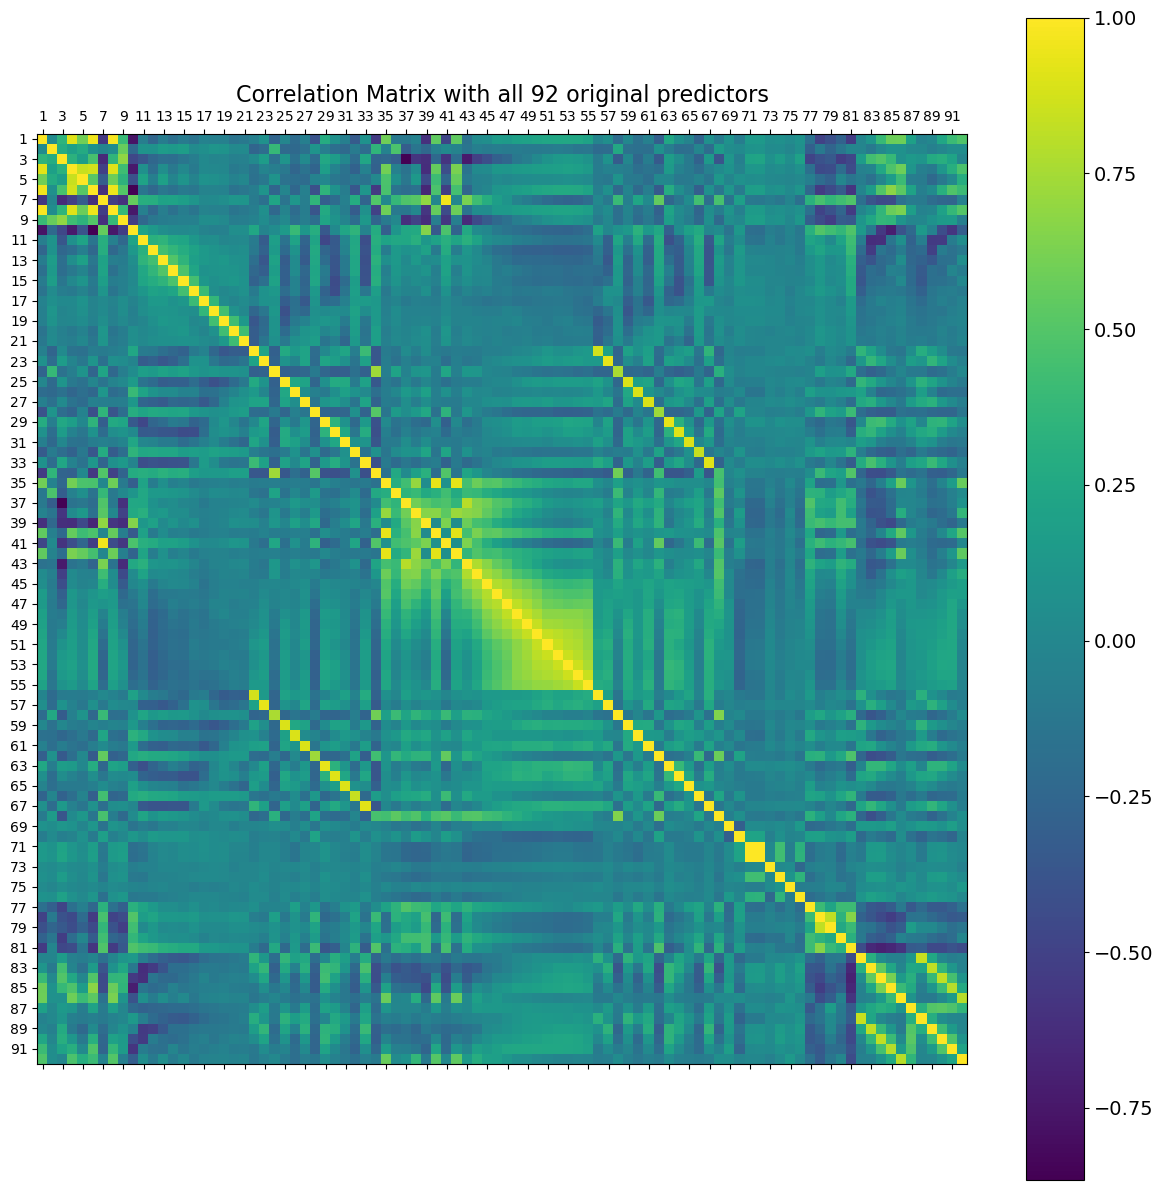

In [5]:
## calculate correlation matrix for original predictors
## https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
## correlation calculation not affected by scale so don't need to scale yet
f = plt.figure(figsize=(15, 15))
plt.matshow(songs.iloc[:,:-1].corr(), fignum=f.number)
plt.xticks(range(0,92,2), range(1,93,2))
plt.yticks(range(0,92,2), range(1,93,2))
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix with all 92 original predictors', fontsize=16)

## Split data to training and test

In [6]:
## split to 80% training and 20% test
## separate predictors (audio features) and labels (genres)

np.random.seed(6740) # set seed for repeatability

# split 80% to training, sample evenly from each class
# https://stackoverflow.com/questions/40645524/how-can-i-sample-equally-from-a-dataframe
n = len(songs) # number of samples in full dataset
Train = songs.groupby('class').apply(lambda x: x.sample(int(0.8*n/num_genres)))
xtrain = Train.iloc[:,:-1].to_numpy() # audio features for training
ytrain = Train.iloc[:,-1].to_numpy() # genres for training
print(xtrain.shape) # 1840 x 92
print(ytrain.shape) # 1840,

# split to 20% test, sample evenly from each class
# https://stackoverflow.com/questions/29134635/slice-pandas-dataframe-by-index-values-that-are-not-in-a-list
train_indices = Train.index.values.tolist() # list of tuples (class, index)
train_indices = [z[1] for z in train_indices] # to extract the indices of training data
Test = songs.loc[~songs.index.isin(train_indices)] # select all rows not in the training data
xtest = Test.iloc[:,:-1].to_numpy() # audio features for test
ytest = Test.iloc[:,-1].to_numpy() # genres for test
print(xtest.shape) # 460 x 92
print(ytest.shape) # 460,


(1840, 92)
(1840,)
(460, 92)
(460,)


In [7]:
# check that classes are evenly balanced in training data
pd.DataFrame(ytrain).value_counts()

BigRoom                 80
HardcoreHardTechno      80
Techno                  80
TechHouse               80
ReggaeDub               80
PsyTrance               80
ProgressiveHouse        80
Minimal                 80
IndieDanceNuDisco       80
House                   80
HipHop                  80
HardDance               80
Breaks                  80
GlitchHop               80
FutureHouse             80
FunkRAndB               80
ElectronicaDowntempo    80
ElectroHouse            80
Dubstep                 80
DrumAndBass             80
DeepHouse               80
Dance                   80
Trance                  80
Name: count, dtype: int64

In [8]:
# check that classes are evenly balanced in test data
pd.DataFrame(ytest).value_counts()

BigRoom                 20
HardcoreHardTechno      20
Techno                  20
TechHouse               20
ReggaeDub               20
PsyTrance               20
ProgressiveHouse        20
Minimal                 20
IndieDanceNuDisco       20
House                   20
HipHop                  20
HardDance               20
Breaks                  20
GlitchHop               20
FutureHouse             20
FunkRAndB               20
ElectronicaDowntempo    20
ElectroHouse            20
Dubstep                 20
DrumAndBass             20
DeepHouse               20
Dance                   20
Trance                  20
Name: count, dtype: int64

## Scale data

In [9]:
# scale the training data then apply the same normalization parameters to transform the test data
# https://datascience.stackexchange.com/questions/54908/data-normalization-before-or-after-train-test-split
scaler = StandardScaler()
scaler.fit(xtrain) # fit to training data

xtrain = scaler.transform(xtrain) # transform training data
xtest = scaler.transform(xtest) # transform test data

## Train and test models (with original features)

### Logistic Regression (with original features)

In [10]:
## run Logistic Regression with default parameters

# build model with scaled training data
LR_clf = LogisticRegression(max_iter=10000, solver='lbfgs', random_state=6740) # lfbgs runs fastest and can handle multiclass problems
LR_clf.fit(xtrain, ytrain)
print(LR_clf.get_params())

acc = LR_clf.score(xtest, ytest)
print("The accuracy with default hyperparameters is: " + str(acc))

# # predict classifications on scaled test data
# LR_yhat = LR_clf.predict(xtest)

# LR_cr = classification_report(ytest, LR_yhat, output_dict=True) # create dictionary of metrics
# print(classification_report(ytest, LR_yhat)) # print out performance metrics

# disp = ConfusionMatrixDisplay.from_predictions(ytest, LR_yhat, xticks_rotation='vertical') # plot confusion matrix
# fig = disp.figure_
# fig.set_figwidth(10)
# fig.set_figheight(10) 

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 10000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 6740, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
The accuracy with default hyperparameters is: 0.49782608695652175


In [11]:
## perform CV search for Logistic Regression

LR = LogisticRegression(max_iter=10000, solver='lbfgs', random_state=6740)
regs = np.logspace(-2, 2, num=5, base=10)
parameters = {'C':regs}

LR_clf = GridSearchCV(LR, parameters, cv=3, scoring='accuracy').fit(xtrain, ytrain)


{'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 10000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 6740, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
                      precision    recall  f1-score   support

             BigRoom       0.50      0.55      0.52        20
              Breaks       0.44      0.40      0.42        20
               Dance       0.32      0.30      0.31        20
           DeepHouse       0.31      0.25      0.28        20
         DrumAndBass       0.85      0.85      0.85        20
             Dubstep       0.75      0.60      0.67        20
        ElectroHouse       0.42      0.40      0.41        20
ElectronicaDowntempo       0.27      0.30      0.29        20
           FunkRAndB       0.55      0.60      0.57        20
         FutureHouse       0.34      0.50      0.41        20
           GlitchHop       0.67      0

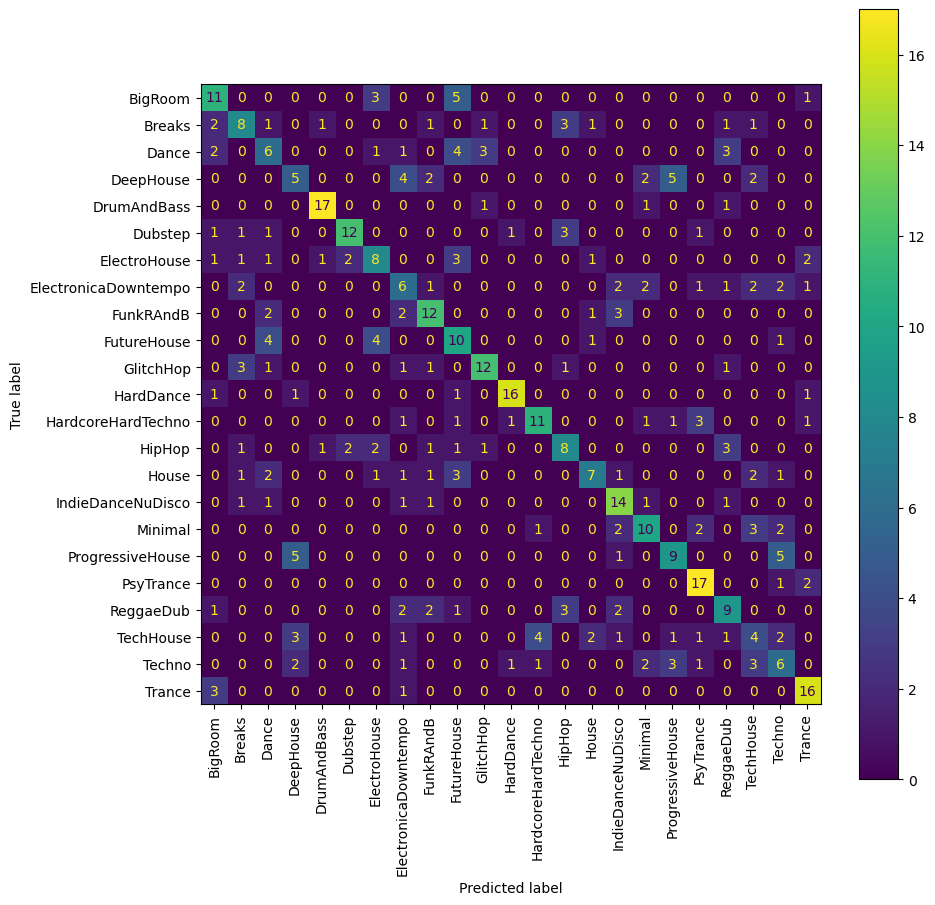

In [12]:
## fit Logistic Regression model with best tuned hyperparameters

best_LR = LR_clf.best_estimator_
best_LR.fit(xtrain, ytrain)
print(best_LR.get_params())

# predict classifications on scaled test data
LR_yhat = best_LR.predict(xtest)

LR_cr = classification_report(ytest, LR_yhat, output_dict=True) # create dictionary of metrics
print(classification_report(ytest, LR_yhat)) # print out performance metrics

matrix = confusion_matrix(ytest, LR_yhat) # calculate confusion matrix
LR_ca = matrix.diagonal()/matrix.sum(axis=1) # calculate accuracy for each class

disp = ConfusionMatrixDisplay.from_predictions(ytest, LR_yhat, xticks_rotation='vertical') # plot confusion matrix
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10) 

### Linear SVM (with original features)

In [13]:
## run Linear SVM

# build model with scaled training data
LinSVM_clf = LinearSVC(max_iter=10000, random_state=6740)
LinSVM_clf.fit(xtrain, ytrain)
print(LinSVM_clf.get_params())

acc = LinSVM_clf.score(xtest, ytest)
print("The accuracy with default hyperparameters is: " + str(acc))

# # predict classifications on scaled test data
# LinSVM_yhat = LinSVM_clf.predict(xtest)

# LinSVM_cr = classification_report(ytest, LinSVM_yhat, output_dict=True) # create dictionary of metrics
# print(classification_report(ytest, LinSVM_yhat)) # print out performance metrics

# disp = ConfusionMatrixDisplay.from_predictions(ytest, LinSVM_yhat, xticks_rotation='vertical') # plot confusion matrix
# fig = disp.figure_
# fig.set_figwidth(10)
# fig.set_figheight(10) 

{'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 10000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 6740, 'tol': 0.0001, 'verbose': 0}
The accuracy with default hyperparameters is: 0.5


In [14]:
## perform CV search for Linear SVM

LinSVM = LinearSVC(max_iter=10000, random_state=6740)
regs = np.logspace(-3, 0, num=4, base=10)
parameters = {'C':regs}

LinSVM_clf = GridSearchCV(LinSVM, parameters, cv=3, scoring='accuracy').fit(xtrain, ytrain)

{'C': 0.01, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 10000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 6740, 'tol': 0.0001, 'verbose': 0}
                      precision    recall  f1-score   support

             BigRoom       0.52      0.65      0.58        20
              Breaks       0.30      0.30      0.30        20
               Dance       0.23      0.15      0.18        20
           DeepHouse       0.50      0.30      0.37        20
         DrumAndBass       0.77      0.85      0.81        20
             Dubstep       0.55      0.60      0.57        20
        ElectroHouse       0.83      0.25      0.38        20
ElectronicaDowntempo       0.27      0.30      0.29        20
           FunkRAndB       0.54      0.70      0.61        20
         FutureHouse       0.36      0.45      0.40        20
           GlitchHop       0.68      0.65      0.67        20
           HardDance      

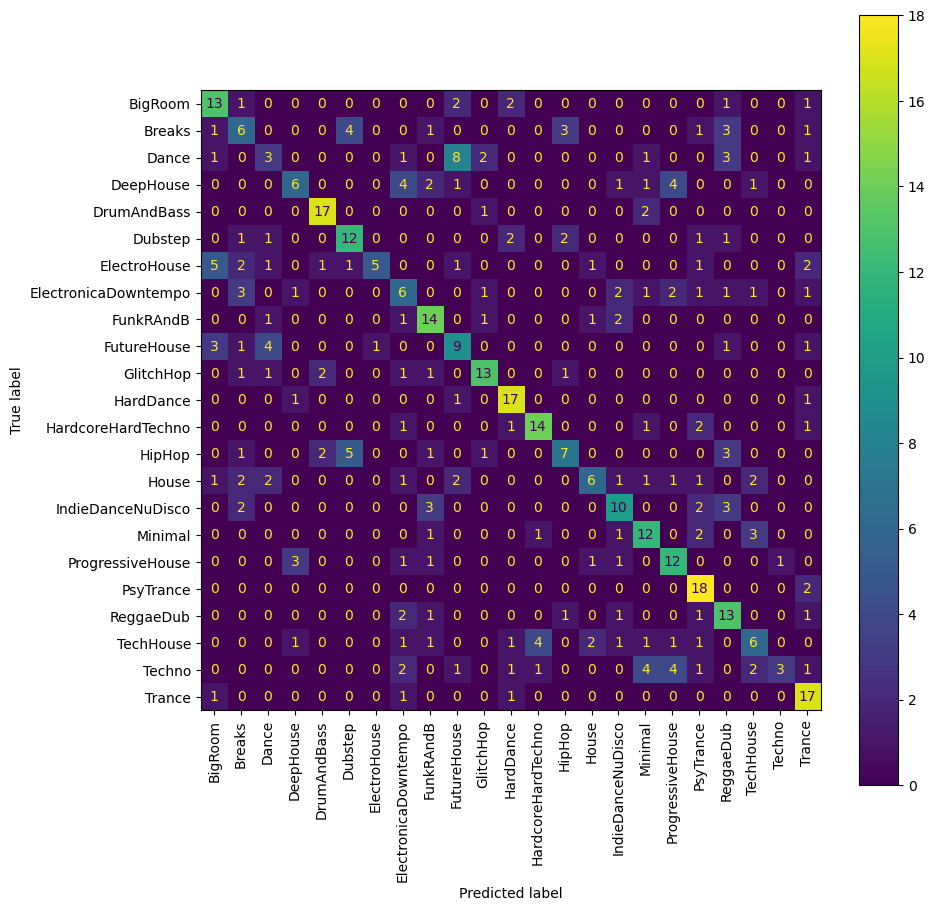

In [15]:
## fit Linear SVM model with best tuned hyperparameters

best_LinSVM = LinSVM_clf.best_estimator_
best_LinSVM.fit(xtrain, ytrain)
print(best_LinSVM.get_params())

# predict classifications on scaled test data
LinSVM_yhat = best_LinSVM.predict(xtest)

LinSVM_cr = classification_report(ytest, LinSVM_yhat, output_dict=True) # create dictionary of metrics
print(classification_report(ytest, LinSVM_yhat)) # print out performance metrics

matrix = confusion_matrix(ytest, LinSVM_yhat) # calculate confusion matrix
LinSVM_ca = matrix.diagonal()/matrix.sum(axis=1) # calculate accuracy for each class

disp = ConfusionMatrixDisplay.from_predictions(ytest, LinSVM_yhat, xticks_rotation='vertical') # plot confusion matrix
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10) 

### RBF SVM (with original features)

In [16]:
## run rbf (radial basis function) SVM

# build model with scaled training data
rbfSVM_clf = SVC(kernel='rbf', random_state=6740)
rbfSVM_clf.fit(xtrain, ytrain)
print(rbfSVM_clf.get_params())

acc = rbfSVM_clf.score(xtest, ytest)
print("The accuracy with default hyperparameters is: " + str(acc))

# # predict classifications on scaled test data
# rbfSVM_yhat = rbfSVM_clf.predict(xtest)

# rbfSVM_cr = classification_report(ytest, rbfSVM_yhat, output_dict=True) # create dictionary of metrics
# print(classification_report(ytest, rbfSVM_yhat)) # print out performance metrics

# disp = ConfusionMatrixDisplay.from_predictions(ytest, rbfSVM_yhat, xticks_rotation='vertical') # plot confusion matrix
# fig = disp.figure_
# fig.set_figwidth(10)
# fig.set_figheight(10) 

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 6740, 'shrinking': True, 'tol': 0.001, 'verbose': False}
The accuracy with default hyperparameters is: 0.5173913043478261


In [17]:
## perform CV search for rbf SVM

rbfSVM = SVC(kernel='rbf', random_state=6740)
regs = np.logspace(-2, 2, num=5, base=10)
g = ('auto', 'scale')
parameters = {'C':regs, 'gamma':g}

rbfSVM_clf = GridSearchCV(rbfSVM, parameters, cv=5, scoring='accuracy').fit(xtrain, ytrain)

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 6740, 'shrinking': True, 'tol': 0.001, 'verbose': False}
0.010869565217391304
                      precision    recall  f1-score   support

             BigRoom       0.35      0.65      0.46        20
              Breaks       0.45      0.50      0.48        20
               Dance       0.21      0.20      0.21        20
           DeepHouse       0.32      0.30      0.31        20
         DrumAndBass       0.94      0.85      0.89        20
             Dubstep       0.61      0.55      0.58        20
        ElectroHouse       0.40      0.30      0.34        20
ElectronicaDowntempo       0.24      0.25      0.24        20
           FunkRAndB       0.71      0.60      0.65        20
         FutureHouse       0.44      0.55      0.49        20
           Glitc

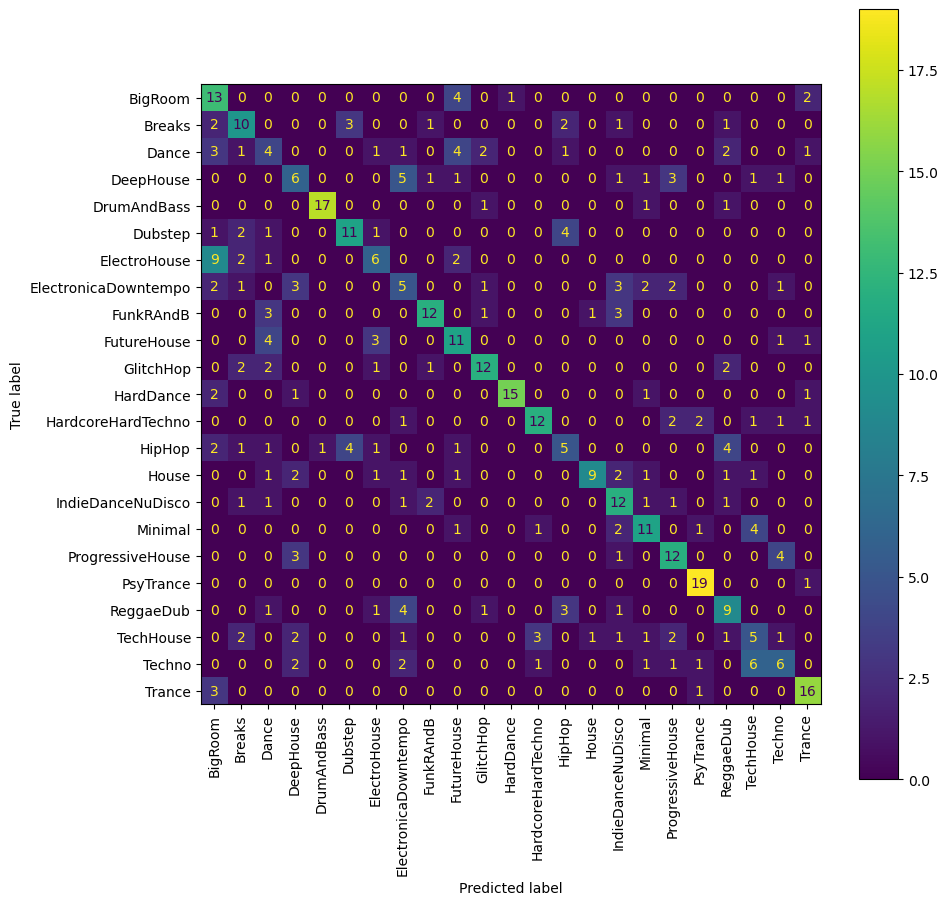

In [18]:
## fit rbf SVM model with best tuned hyperparameters

best_rbfSVM = rbfSVM_clf.best_estimator_
best_rbfSVM.fit(xtrain, ytrain)
print(best_rbfSVM.get_params())
print(best_rbfSVM._gamma)

# predict classifications on scaled test data
rbfSVM_yhat = best_rbfSVM.predict(xtest)

rbfSVM_cr = classification_report(ytest, rbfSVM_yhat, output_dict=True) # create dictionary of metrics
print(classification_report(ytest, rbfSVM_yhat)) # print out performance metrics

matrix = confusion_matrix(ytest, rbfSVM_yhat) # calculate confusion matrix
rbfSVM_ca = matrix.diagonal()/matrix.sum(axis=1) # calculate accuracy for each class

disp = ConfusionMatrixDisplay.from_predictions(ytest, rbfSVM_yhat, xticks_rotation='vertical') # plot confusion matrix
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10) 

### Neural Network (with original features)

In [19]:
## run neural network

# build model with scaled training data
NN_clf = MLPClassifier(max_iter=1000, learning_rate_init=0.1, random_state=6740)
NN_clf.fit(xtrain, ytrain)
print(NN_clf.get_params())

acc = NN_clf.score(xtest, ytest)
print("The accuracy with default hyperparameters is: " + str(acc))

# # predict classifications on scaled test data
# NN_yhat = NN_clf.predict(xtest)

# NN_cr = classification_report(ytest, NN_yhat, output_dict=True) # create dictionary of metrics
# print(classification_report(ytest, NN_yhat)) # print out performance metrics

# disp = ConfusionMatrixDisplay.from_predictions(ytest, NN_yhat, xticks_rotation='vertical') # plot confusion matrix
# fig = disp.figure_
# fig.set_figwidth(10)
# fig.set_figheight(10) 

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 6740, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
The accuracy with default hyperparameters is: 0.4369565217391304


In [20]:
## perform CV search for neural network

NN = MLPClassifier(max_iter=1000, learning_rate_init=0.1, solver='sgd', random_state=6740)
hls = ((5000,), (500,500), (1000,500))
# sol = ('adam', 'sgd') # sgd usually better than adam, removing this gridsearch to reduce runtime
parameters = {'hidden_layer_sizes': hls} # , 'solver': sol}

NN_clf = GridSearchCV(NN, parameters, cv=3, scoring='accuracy').fit(xtrain, ytrain)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (1000, 500), 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 6740, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
                      precision    recall  f1-score   support

             BigRoom       0.62      0.65      0.63        20
              Breaks       0.45      0.45      0.45        20
               Dance       0.26      0.25      0.26        20
           DeepHouse       0.44      0.35      0.39        20
         DrumAndBass       0.94      0.85      0.89        20
             Dubstep       0.73      0.55      0.63        20
        ElectroHouse       0.44      0.55      0.49        20
ElectronicaDownt

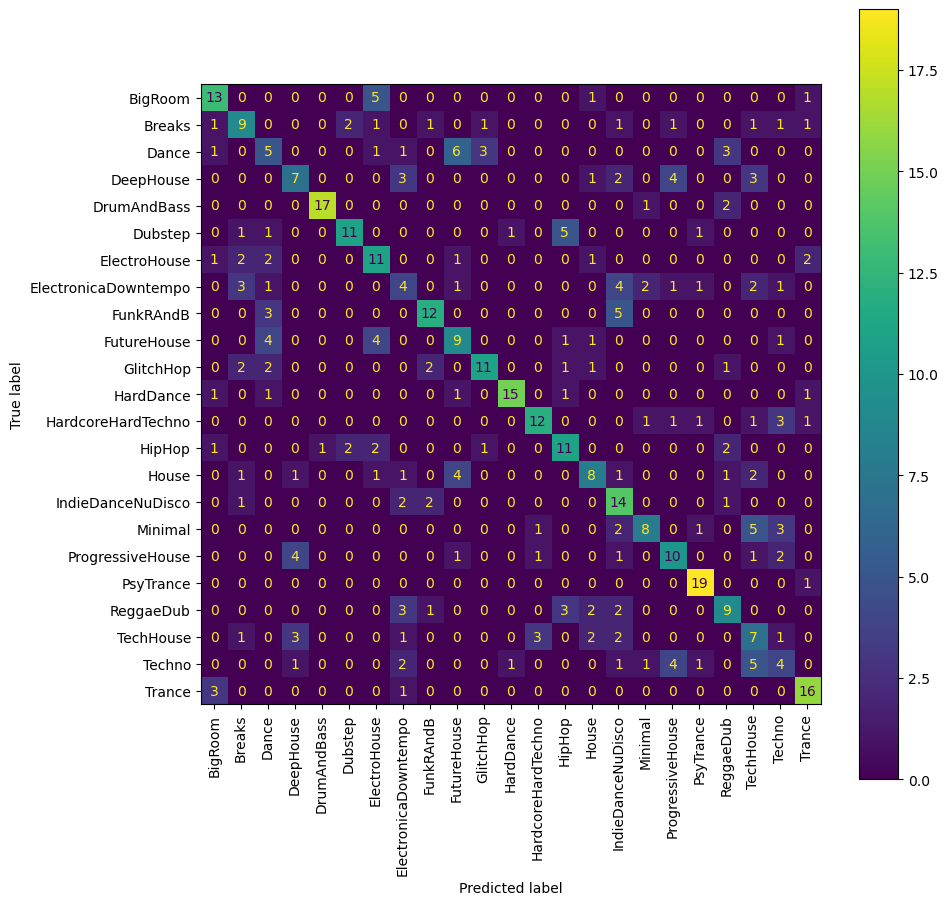

In [21]:
## fit neural network model with best tuned hyperparameters

best_NN = NN_clf.best_estimator_
best_NN.fit(xtrain, ytrain)
print(best_NN.get_params())

# predict classifications on scaled test data
NN_yhat = best_NN.predict(xtest)

NN_cr = classification_report(ytest, NN_yhat, output_dict=True) # create dictionary of metrics
print(classification_report(ytest, NN_yhat)) # print out performance metrics

matrix = confusion_matrix(ytest, NN_yhat) # calculate confusion matrix
NN_ca = matrix.diagonal()/matrix.sum(axis=1) # calculate accuracy for each class

disp = ConfusionMatrixDisplay.from_predictions(ytest, NN_yhat, xticks_rotation='vertical') # plot confusion matrix
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10) 

### Random Forest (with original features)

In [22]:
## run random forest

# build model with scaled training data
RF_clf = RandomForestClassifier(random_state=6740)
RF_clf.fit(xtrain, ytrain)
print(RF_clf.get_params())

acc = RF_clf.score(xtest, ytest)
print("The accuracy with default hyperparameters is: " + str(acc))

# # predict classifications on scaled test data
# RF_yhat = RF_clf.predict(xtest)

# RF_cr = classification_report(ytest, RF_yhat, output_dict=True) # create dictionary of metrics
# print(classification_report(ytest, RF_yhat)) # print out performance metrics

# disp = ConfusionMatrixDisplay.from_predictions(ytest, RF_yhat, xticks_rotation='vertical') # plot confusion matrix
# fig = disp.figure_
# fig.set_figwidth(10)
# fig.set_figheight(10) 

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 6740, 'verbose': 0, 'warm_start': False}
The accuracy with default hyperparameters is: 0.5521739130434783


In [23]:
## perform CV search for random forest

RF = RandomForestClassifier(n_estimators=1000, criterion='gini', random_state=6740)
# trees = np.logspace(2, 3, num=2, base=10).astype(int) # 1000 is slightly better than 100 trees
# c = ('gini', 'entropy', 'log_loss') # gini is generally the best
mtry = range(7,14,3) # optimal is 10 or 13

parameters = {'max_features': mtry}

RF_clf = GridSearchCV(RF, parameters, cv=3, scoring='accuracy').fit(xtrain, ytrain)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 6740, 'verbose': 0, 'warm_start': False}
                      precision    recall  f1-score   support

             BigRoom       0.41      0.60      0.49        20
              Breaks       0.63      0.60      0.62        20
               Dance       0.38      0.15      0.21        20
           DeepHouse       0.60      0.45      0.51        20
         DrumAndBass       0.82      0.90      0.86        20
             Dubstep       0.71      0.50      0.59        20
        ElectroHouse       0.47      0.45      0.46        20
ElectronicaDowntempo       0.35      0.35      0.35        20
           FunkRAndB       0.65      0.65      0.65

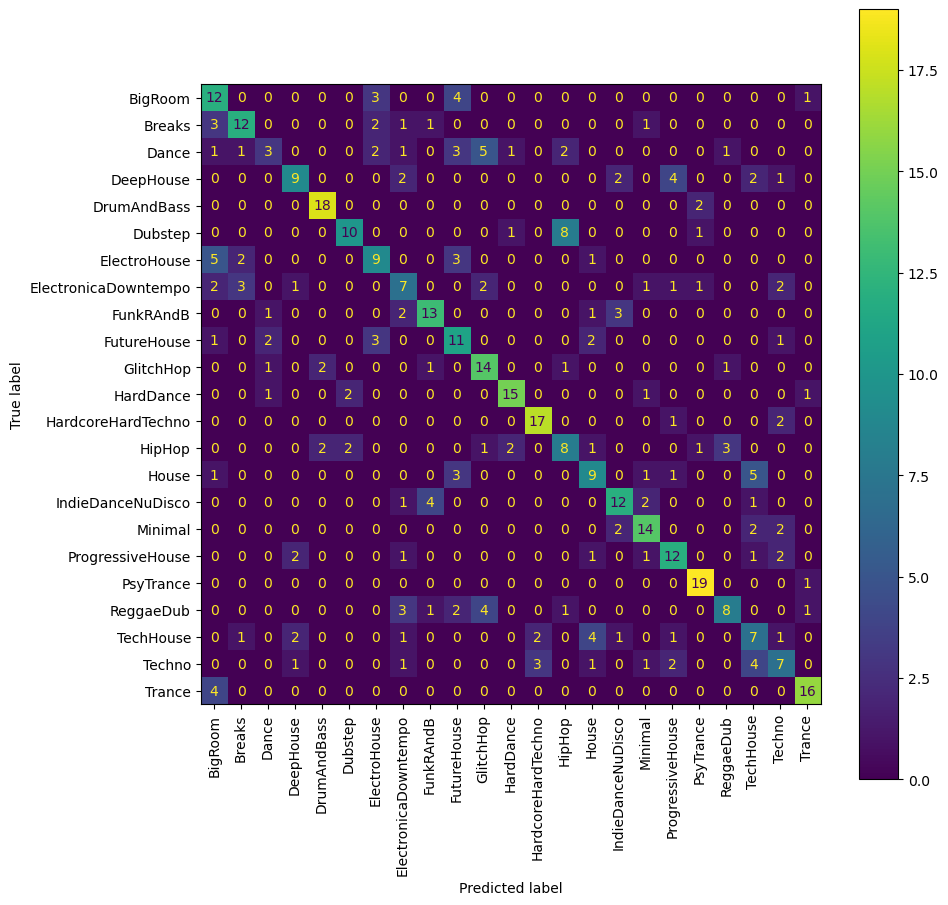

In [24]:
## fit random forest model with best tuned hyperparameters

best_RF = RF_clf.best_estimator_
best_RF.fit(xtrain, ytrain)
print(best_RF.get_params())

# predict classifications on scaled test data
RF_yhat = best_RF.predict(xtest)

RF_cr = classification_report(ytest, RF_yhat, output_dict=True) # create dictionary of metrics
print(classification_report(ytest, RF_yhat)) # print out performance metrics

matrix = confusion_matrix(ytest, RF_yhat) # calculate confusion matrix
RF_ca = matrix.diagonal()/matrix.sum(axis=1) # calculate accuracy for each class

disp = ConfusionMatrixDisplay.from_predictions(ytest, RF_yhat, xticks_rotation='vertical') # plot confusion matrix
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10) 

### KNN (with original features)

In [25]:
## run KNN

# build model with scaled training data
KNN_clf = KNeighborsClassifier()
KNN_clf.fit(xtrain, ytrain)
print(KNN_clf.get_params())

acc = KNN_clf.score(xtest, ytest)
print("The accuracy with default hyperparameters is: " + str(acc))

# # predict classifications on scaled test data
# KNN_yhat = KNN_clf.predict(xtest)

# KNN_cr = classification_report(ytest, KNN_yhat, output_dict=True) # create dictionary of metrics
# print(classification_report(ytest, KNN_yhat)) # print out performance metrics

# disp = ConfusionMatrixDisplay.from_predictions(ytest, KNN_yhat, xticks_rotation='vertical') # plot confusion matrix
# fig = disp.figure_
# fig.set_figwidth(10)
# fig.set_figheight(10) 

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
The accuracy with default hyperparameters is: 0.3565217391304348


In [26]:
## perform CV search for KNN

KNN = KNeighborsClassifier()
n_n = range(1,16,2)
w = ('uniform', 'distance')
power = range(1,4)
parameters = {'n_neighbors': n_n, 'weights': w, 'p': power}

KNN_clf = GridSearchCV(KNN, parameters, cv=3, scoring='accuracy').fit(xtrain, ytrain)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
                      precision    recall  f1-score   support

             BigRoom       0.27      0.60      0.37        20
              Breaks       0.35      0.40      0.37        20
               Dance       0.22      0.25      0.23        20
           DeepHouse       0.17      0.05      0.08        20
         DrumAndBass       0.94      0.75      0.83        20
             Dubstep       0.50      0.40      0.44        20
        ElectroHouse       0.22      0.30      0.26        20
ElectronicaDowntempo       0.25      0.10      0.14        20
           FunkRAndB       0.67      0.70      0.68        20
         FutureHouse       0.25      0.45      0.32        20
           GlitchHop       0.53      0.50      0.51        20
           HardDance       0.78      0.70      0.74        20
  HardcoreHardTechno       0.55      0.30  

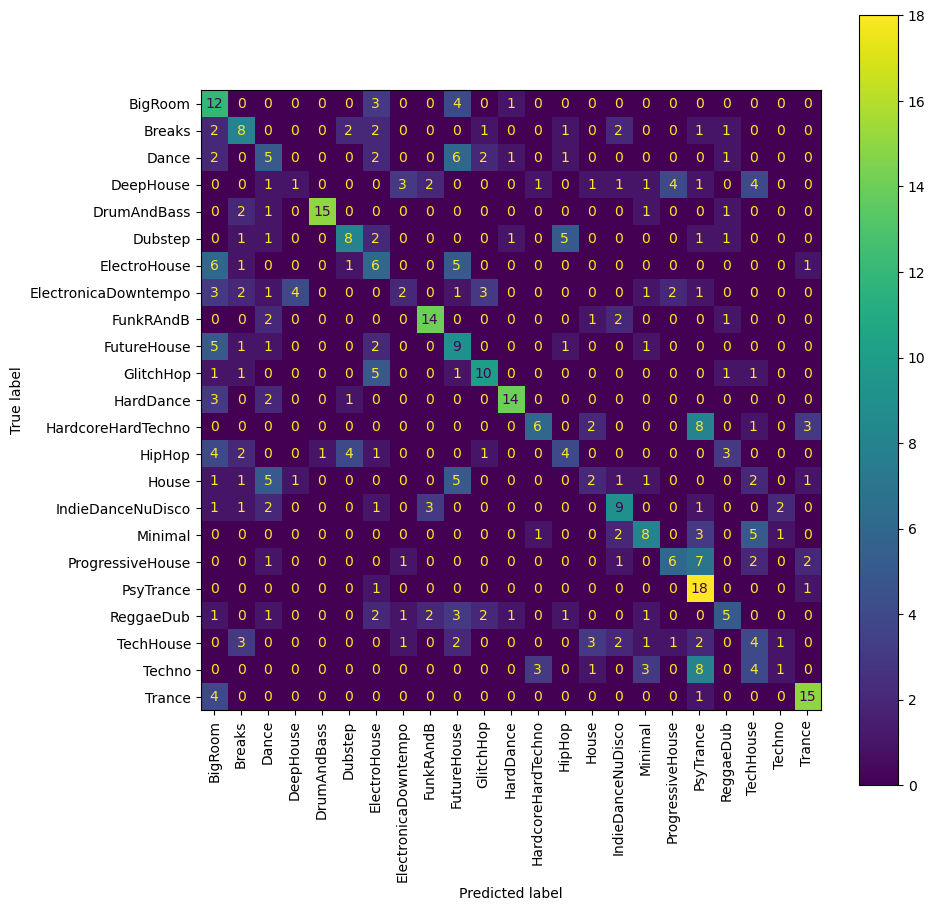

In [27]:
## fit KNN model with best tuned hyperparameters

best_KNN = KNN_clf.best_estimator_
best_KNN.fit(xtrain, ytrain)
print(best_KNN.get_params())

# predict classifications on scaled test data
KNN_yhat = best_KNN.predict(xtest)

KNN_cr = classification_report(ytest, KNN_yhat, output_dict=True) # create dictionary of metrics
print(classification_report(ytest, KNN_yhat)) # print out performance metrics

matrix = confusion_matrix(ytest, KNN_yhat) # calculate confusion matrix
KNN_ca = matrix.diagonal()/matrix.sum(axis=1) # calculate accuracy for each class

disp = ConfusionMatrixDisplay.from_predictions(ytest, KNN_yhat, xticks_rotation='vertical') # plot confusion matrix
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10) 

## Perform PCA transform

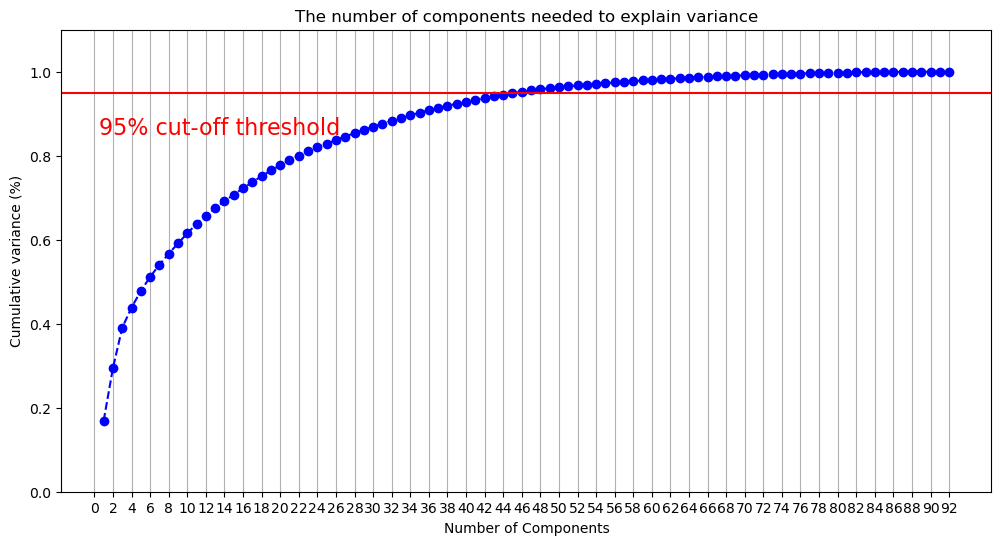

In [28]:
## find number of principal components that captures ~95% of variability
## https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/

pca = PCA(random_state=6740)
pca.fit(xtrain) # fit with training data

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 93, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 93, step=2)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()



In [29]:
## Fit training data to 46 principal components then apply the same transformation to test data

pca2 = PCA(n_components=46, random_state=6740)
pca2.fit(xtrain) # fit with training data

pc_xtrain = pca2.transform(xtrain) # transform training data to principal components
pc_xtest = pca2.transform(xtest) # transform test data to principal components

Text(0.5, 1.0, 'Correlation Matrix with 46 top principal components')

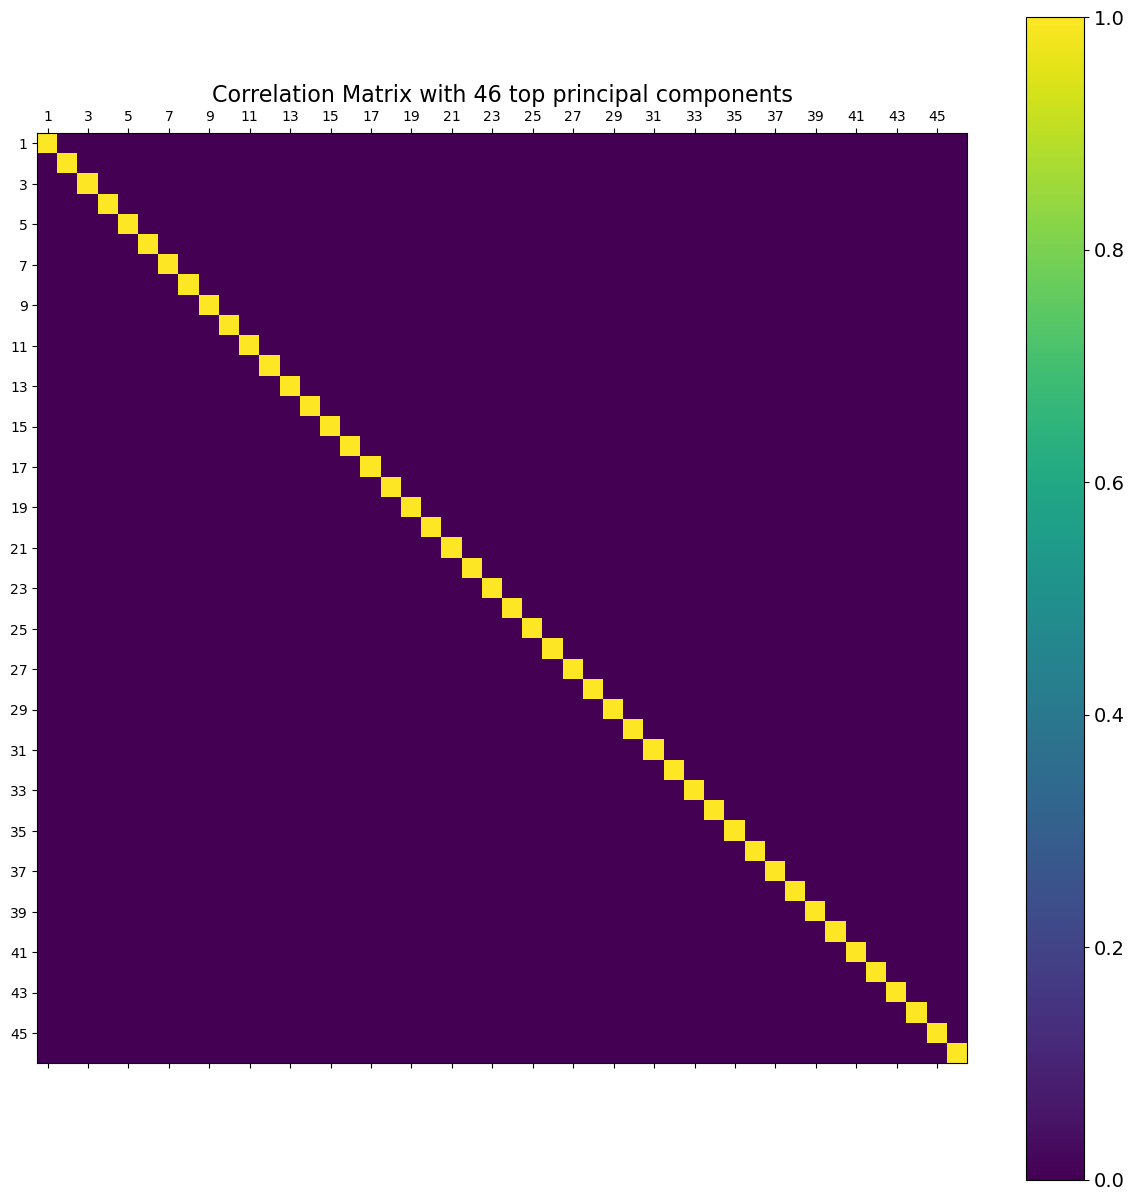

In [30]:
## calculate correlation matrix for PCA components
## https://stackoverflow.com/questions/52769130/how-can-you-create-a-correlation-matrix-in-pca-on-python
## not sure if this is correct, don't think that correlation should be 0 between everything
f = plt.figure(figsize=(15, 15))
plt.matshow(np.corrcoef(pc_xtrain,rowvar=False), fignum=f.number)
plt.xticks(range(0,46,2), range(1,47,2))
plt.yticks(range(0,46,2), range(1,47,2))
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix with 46 top principal components', fontsize=16)

## Train and test models (with principal components)

### Logistic Regression (with PC)

In [31]:
## run Logistic Regression on PC data

# build model with training data transformed to principal components
LR_clf2 = LogisticRegression(max_iter=10000, solver='lbfgs', random_state=6740) # lfbgs runs fastest and can handle multiclass problems
LR_clf2.fit(pc_xtrain, ytrain)
print(LR_clf2.get_params())

acc = LR_clf2.score(pc_xtest, ytest)
print("The accuracy with default hyperparameters is: " + str(acc))

# # predict classifications on test data transformed to principal components
# LR_yhat2 = LR_clf2.predict(pc_xtest)

# LR_cr2 = classification_report(ytest, LR_yhat2, output_dict=True) # create dictionary of metrics
# print(classification_report(ytest, LR_yhat2)) # print out performance metrics

# disp = ConfusionMatrixDisplay.from_predictions(ytest, LR_yhat2, xticks_rotation='vertical') # plot confusion matrix
# fig = disp.figure_
# fig.set_figwidth(10)
# fig.set_figheight(10) 

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 10000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 6740, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
The accuracy with default hyperparameters is: 0.47391304347826085


In [32]:
## perform CV search for Logistic Regression on PC data

LR2 = LogisticRegression(max_iter=10000, solver='lbfgs', random_state=6740)
regs = np.logspace(-2, 2, num=5, base=10)
parameters = {'C':regs}

LR_clf2 = GridSearchCV(LR2, parameters, cv=3, scoring='accuracy').fit(pc_xtrain, ytrain)

{'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 10000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 6740, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
                      precision    recall  f1-score   support

             BigRoom       0.48      0.50      0.49        20
              Breaks       0.41      0.45      0.43        20
               Dance       0.35      0.30      0.32        20
           DeepHouse       0.38      0.25      0.30        20
         DrumAndBass       0.94      0.85      0.89        20
             Dubstep       0.52      0.55      0.54        20
        ElectroHouse       0.30      0.30      0.30        20
ElectronicaDowntempo       0.32      0.30      0.31        20
           FunkRAndB       0.53      0.50      0.51        20
         FutureHouse       0.37      0.50      0.43        20
           GlitchHop       0.67      0

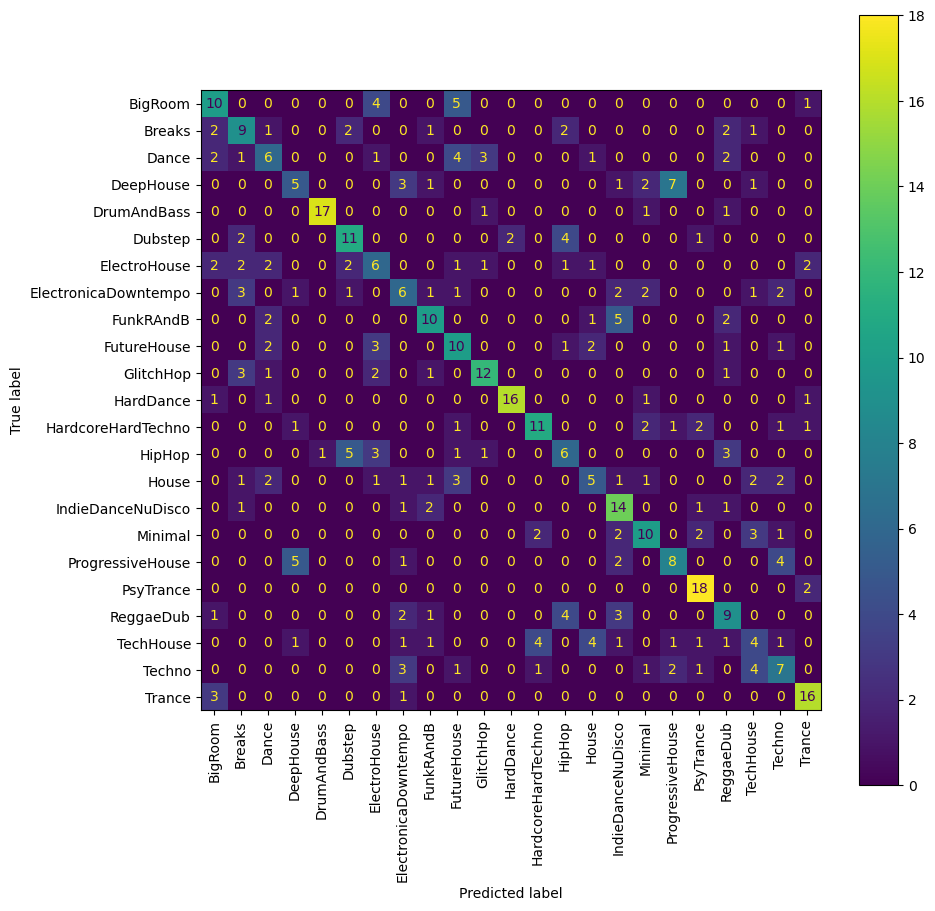

In [33]:
## fit Logistic Regression model with best tuned hyperparameters on PC data

best_LR2 = LR_clf2.best_estimator_
best_LR2.fit(pc_xtrain, ytrain)
print(best_LR2.get_params())

# predict classifications on scaled test data
LR_yhat2 = best_LR2.predict(pc_xtest)

LR_cr2 = classification_report(ytest, LR_yhat2, output_dict=True) # create dictionary of metrics
print(classification_report(ytest, LR_yhat2)) # print out performance metrics

matrix = confusion_matrix(ytest, LR_yhat2) # calculate confusion matrix
LR_ca2 = matrix.diagonal()/matrix.sum(axis=1) # calculate accuracy for each class

disp = ConfusionMatrixDisplay.from_predictions(ytest, LR_yhat2, xticks_rotation='vertical') # plot confusion matrix
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10) 

### Linear SVM (with PC)

In [34]:
## run (linear) SVM on PC data

# build model with training data transformed to principal components
LinSVM_clf2 = LinearSVC(max_iter=50000, random_state=6740)
LinSVM_clf2.fit(pc_xtrain, ytrain)
print(LinSVM_clf2.get_params())

acc = LinSVM_clf2.score(pc_xtest, ytest)
print("The accuracy with default hyperparameters is: " + str(acc))

# # predict classifications on test data transformed to principal components
# LinSVM_yhat2 = LinSVM_clf2.predict(pc_xtest)

# LinSVM_cr2 = classification_report(ytest, LinSVM_yhat2, output_dict=True) # create dictionary of metrics
# print(classification_report(ytest, LinSVM_yhat2)) # print out performance metrics

# disp = ConfusionMatrixDisplay.from_predictions(ytest, LinSVM_yhat2, xticks_rotation='vertical') # plot confusion matrix
# fig = disp.figure_
# fig.set_figwidth(10)
# fig.set_figheight(10) 

{'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 50000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 6740, 'tol': 0.0001, 'verbose': 0}
The accuracy with default hyperparameters is: 0.46956521739130436


In [35]:
## perform CV search for Linear SVM on PC data

LinSVM2 = LinearSVC(max_iter=50000, random_state=6740)
regs = np.logspace(-3, 0, num=4, base=10)
parameters = {'C':regs}

LinSVM_clf2 = GridSearchCV(LinSVM2, parameters, cv=3, scoring='accuracy').fit(pc_xtrain, ytrain)

{'C': 0.1, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 50000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 6740, 'tol': 0.0001, 'verbose': 0}
                      precision    recall  f1-score   support

             BigRoom       0.43      0.65      0.52        20
              Breaks       0.37      0.35      0.36        20
               Dance       0.44      0.20      0.28        20
           DeepHouse       0.43      0.30      0.35        20
         DrumAndBass       0.85      0.85      0.85        20
             Dubstep       0.50      0.60      0.55        20
        ElectroHouse       0.33      0.15      0.21        20
ElectronicaDowntempo       0.19      0.20      0.20        20
           FunkRAndB       0.48      0.60      0.53        20
         FutureHouse       0.38      0.30      0.33        20
           GlitchHop       0.59      0.65      0.62        20
           HardDance       

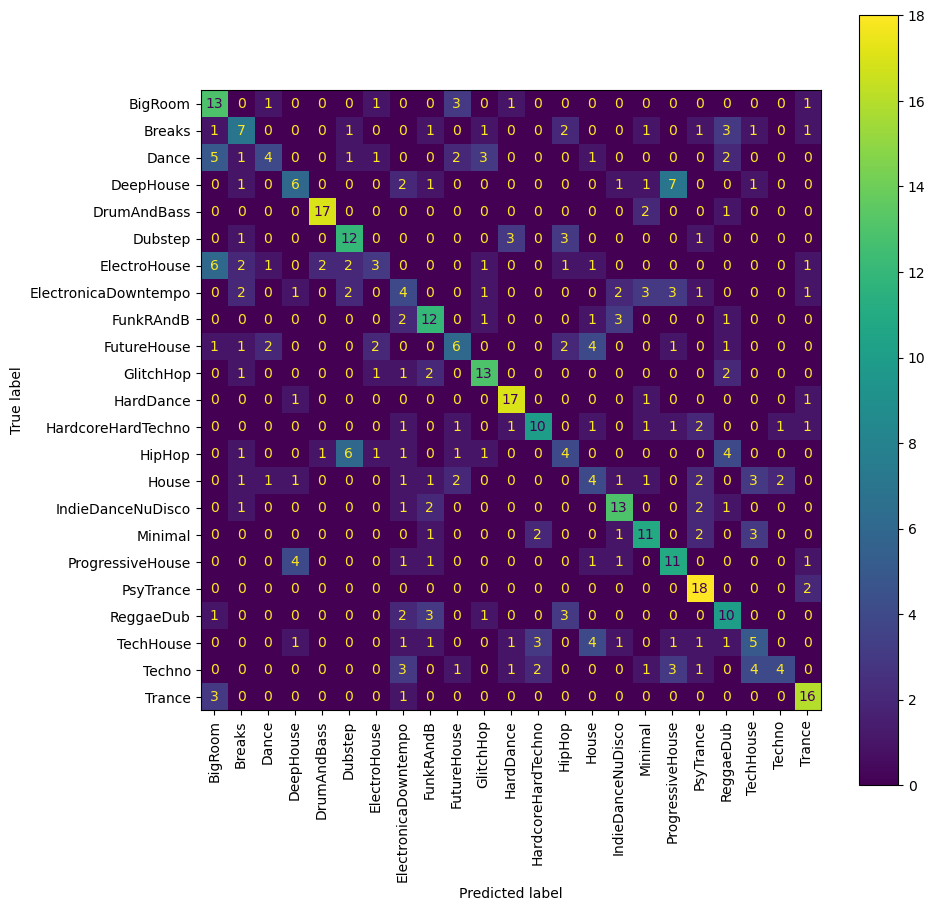

In [36]:
## fit Linear SVM model with best tuned hyperparameters on PC data

best_LinSVM2 = LinSVM_clf2.best_estimator_
best_LinSVM2.fit(pc_xtrain, ytrain)
print(best_LinSVM2.get_params())

# predict classifications on scaled test data
LinSVM_yhat2 = best_LinSVM2.predict(pc_xtest)

LinSVM_cr2 = classification_report(ytest, LinSVM_yhat2, output_dict=True) # create dictionary of metrics
print(classification_report(ytest, LinSVM_yhat2)) # print out performance metrics

matrix = confusion_matrix(ytest, LinSVM_yhat2) # calculate confusion matrix
LinSVM_ca2 = matrix.diagonal()/matrix.sum(axis=1) # calculate accuracy for each class

disp = ConfusionMatrixDisplay.from_predictions(ytest, LinSVM_yhat2, xticks_rotation='vertical') # plot confusion matrix
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10) 

### RBF SVM (with PC)

In [37]:
## run rbf (radial basis function) SVM on PC data

# build model with training data transformed to principal components
rbfSVM_clf2 = SVC(kernel='rbf', random_state=6740)
rbfSVM_clf2.fit(pc_xtrain, ytrain)
print(rbfSVM_clf2.get_params())

acc = rbfSVM_clf2.score(pc_xtest, ytest)
print("The accuracy with default hyperparameters is: " + str(acc))

# # predict classifications on test data transformed to principal components
# rbfSVM_yhat2 = rbfSVM_clf2.predict(pc_xtest)

# rbfSVM_cr2 = classification_report(ytest, rbfSVM_yhat2, output_dict=True) # create dictionary of metrics
# print(classification_report(ytest, rbfSVM_yhat2)) # print out performance metrics

# disp = ConfusionMatrixDisplay.from_predictions(ytest, rbfSVM_yhat2, xticks_rotation='vertical') # plot confusion matrix
# fig = disp.figure_
# fig.set_figwidth(10)
# fig.set_figheight(10) 

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 6740, 'shrinking': True, 'tol': 0.001, 'verbose': False}
The accuracy with default hyperparameters is: 0.5021739130434782


In [38]:
## perform CV search for rbf SVM on PC data

rbfSVM2 = SVC(kernel='rbf', random_state=6740)
regs = np.logspace(-2, 2, num=5, base=10)
g = ('auto', 'scale')
parameters = {'C':regs, 'gamma':g}

rbfSVM_clf2 = GridSearchCV(rbfSVM2, parameters, cv=5, scoring='accuracy').fit(pc_xtrain, ytrain)

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 6740, 'shrinking': True, 'tol': 0.001, 'verbose': False}
0.011413969803728335
                      precision    recall  f1-score   support

             BigRoom       0.36      0.65      0.46        20
              Breaks       0.44      0.55      0.49        20
               Dance       0.14      0.15      0.15        20
           DeepHouse       0.31      0.25      0.28        20
         DrumAndBass       0.94      0.85      0.89        20
             Dubstep       0.62      0.50      0.56        20
        ElectroHouse       0.29      0.25      0.27        20
ElectronicaDowntempo       0.23      0.25      0.24        20
           FunkRAndB       0.75      0.60      0.67        20
         FutureHouse       0.45      0.50      0.48        20
           Glitc

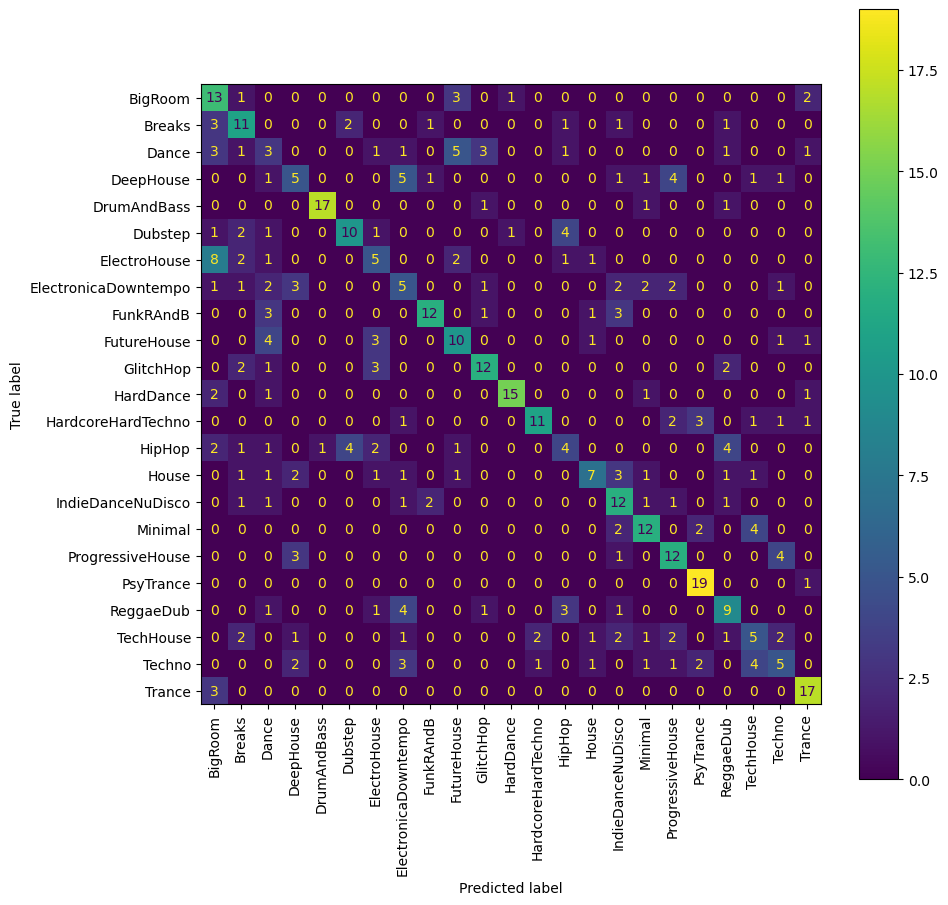

In [39]:
## fit rbf SVM model with best tuned hyperparameters on PC data

best_rbfSVM2 = rbfSVM_clf2.best_estimator_
best_rbfSVM2.fit(pc_xtrain, ytrain)
print(best_rbfSVM2.get_params())
print(best_rbfSVM2._gamma)

# predict classifications on scaled test data
rbfSVM_yhat2 = best_rbfSVM2.predict(pc_xtest)

rbfSVM_cr2 = classification_report(ytest, rbfSVM_yhat2, output_dict=True) # create dictionary of metrics
print(classification_report(ytest, rbfSVM_yhat2)) # print out performance metrics

matrix = confusion_matrix(ytest, rbfSVM_yhat2) # calculate confusion matrix
rbfSVM_ca2 = matrix.diagonal()/matrix.sum(axis=1) # calculate accuracy for each class

disp = ConfusionMatrixDisplay.from_predictions(ytest, rbfSVM_yhat2, xticks_rotation='vertical') # plot confusion matrix
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10) 

### Neural Network (with PC)

In [40]:
## run neural network on PC data

# build model with training data transformed to principal components
NN_clf2 = MLPClassifier(max_iter=1000, learning_rate_init=0.1, random_state=6740)
NN_clf2.fit(pc_xtrain, ytrain)
print(NN_clf2.get_params())

acc = NN_clf2.score(pc_xtest, ytest)
print("The accuracy with default hyperparameters is: " + str(acc))

# # predict classifications on test data transformed to principal components
# NN_yhat2 = NN_clf2.predict(pc_xtest)

# NN_cr2 = classification_report(ytest, NN_yhat2, output_dict=True) # create dictionary of metrics
# print(classification_report(ytest, NN_yhat2)) # print out performance metrics

# disp = ConfusionMatrixDisplay.from_predictions(ytest, NN_yhat2, xticks_rotation='vertical') # plot confusion matrix
# fig = disp.figure_
# fig.set_figwidth(10)
# fig.set_figheight(10) 

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 6740, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
The accuracy with default hyperparameters is: 0.40869565217391307


In [41]:
## perform CV search for neural network on PC data

NN2 = MLPClassifier(max_iter=1000, learning_rate_init=0.1, solver='sgd', random_state=6740)
hls = ((5000,), (500,500), (1000,500))
# sol = ('adam', 'sgd') # sgd usually better than adam, removing this gridsearch to reduce runtime
parameters = {'hidden_layer_sizes': hls} # , 'solver': sol}

NN_clf2 = GridSearchCV(NN2, parameters, cv=3, scoring='accuracy').fit(pc_xtrain, ytrain)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (500, 500), 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 6740, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
                      precision    recall  f1-score   support

             BigRoom       0.53      0.50      0.51        20
              Breaks       0.43      0.50      0.47        20
               Dance       0.35      0.30      0.32        20
           DeepHouse       0.30      0.30      0.30        20
         DrumAndBass       1.00      0.90      0.95        20
             Dubstep       0.63      0.60      0.62        20
        ElectroHouse       0.32      0.30      0.31        20
ElectronicaDownte

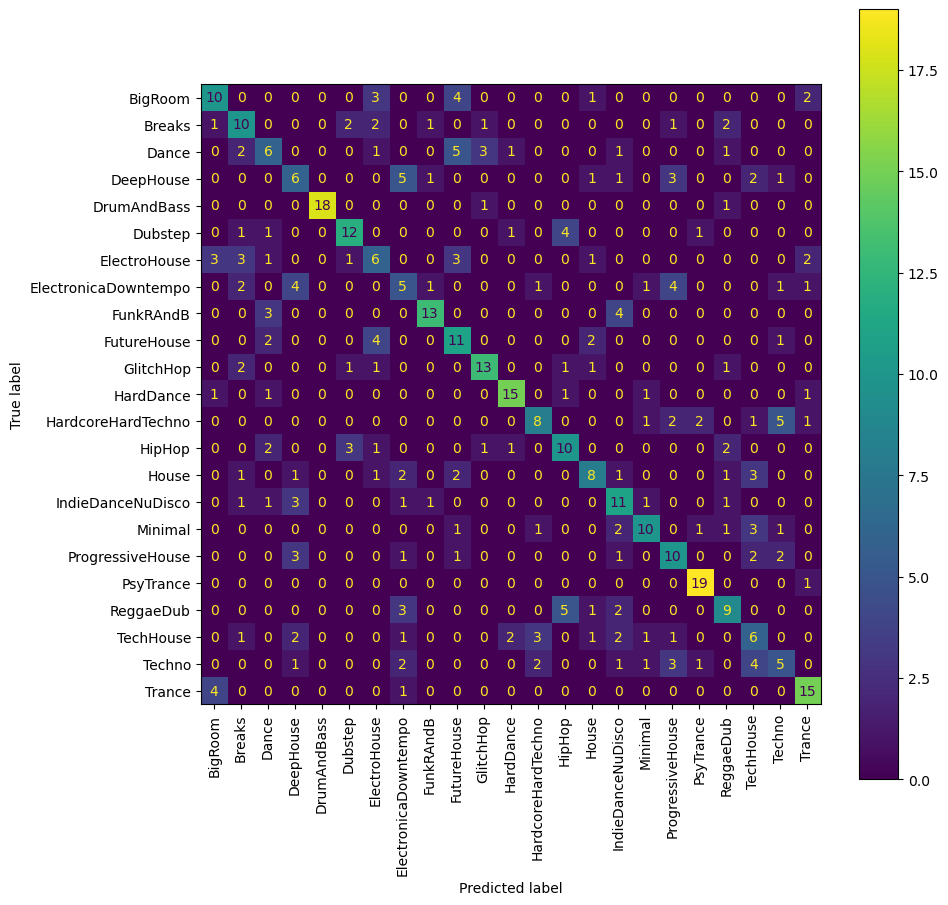

In [42]:
## fit neural network model with best tuned hyperparameters on PC data

best_NN2 = NN_clf2.best_estimator_
best_NN2.fit(pc_xtrain, ytrain)
print(best_NN2.get_params())

# predict classifications on scaled test data
NN_yhat2 = best_NN2.predict(pc_xtest)

NN_cr2 = classification_report(ytest, NN_yhat2, output_dict=True) # create dictionary of metrics
print(classification_report(ytest, NN_yhat2)) # print out performance metrics

matrix = confusion_matrix(ytest, NN_yhat2) # calculate confusion matrix
NN_ca2 = matrix.diagonal()/matrix.sum(axis=1) # calculate accuracy for each class

disp = ConfusionMatrixDisplay.from_predictions(ytest, NN_yhat2, xticks_rotation='vertical') # plot confusion matrix
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10) 

### Random Forest (with PC)

In [43]:
## run random forest on PC data

# build model with training data transformed to principal components
RF_clf2 = RandomForestClassifier(random_state=6740)
RF_clf2.fit(pc_xtrain, ytrain)
print(RF_clf2.get_params())

acc = RF_clf2.score(pc_xtest, ytest)
print("The accuracy with default hyperparameters is: " + str(acc))

# # predict classifications on test data transformed to principal components
# RF_yhat2 = RF_clf2.predict(pc_xtest)

# RF_cr2 = classification_report(ytest, RF_yhat2, output_dict=True) # create dictionary of metrics
# print(classification_report(ytest, RF_yhat2)) # print out performance metrics

# disp = ConfusionMatrixDisplay.from_predictions(ytest, RF_yhat, xticks_rotation='vertical') # plot confusion matrix
# fig = disp.figure_
# fig.set_figwidth(10)
# fig.set_figheight(10) 

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 6740, 'verbose': 0, 'warm_start': False}
The accuracy with default hyperparameters is: 0.41956521739130437


In [44]:
## perform CV search for random forest on PC data

RF2 = RandomForestClassifier(n_estimators=1000, criterion='gini', random_state=6740)
# trees = np.logspace(2, 3, num=2, base=10).astype(int) # 1000 is slightly better than 100 trees
# c = ('gini', 'entropy', 'log_loss') # gini is generally the best
mtry = range(1,11,3) # optimal is 4

parameters = {'max_features': mtry}

RF_clf2 = GridSearchCV(RF2, parameters, cv=3, scoring='accuracy').fit(pc_xtrain, ytrain)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 6740, 'verbose': 0, 'warm_start': False}
                      precision    recall  f1-score   support

             BigRoom       0.25      0.45      0.32        20
              Breaks       0.41      0.45      0.43        20
               Dance       0.18      0.10      0.13        20
           DeepHouse       0.35      0.35      0.35        20
         DrumAndBass       0.72      0.90      0.80        20
             Dubstep       0.69      0.55      0.61        20
        ElectroHouse       0.33      0.20      0.25        20
ElectronicaDowntempo       0.27      0.20      0.23        20
           FunkRAndB       0.48      0.60      0.53 

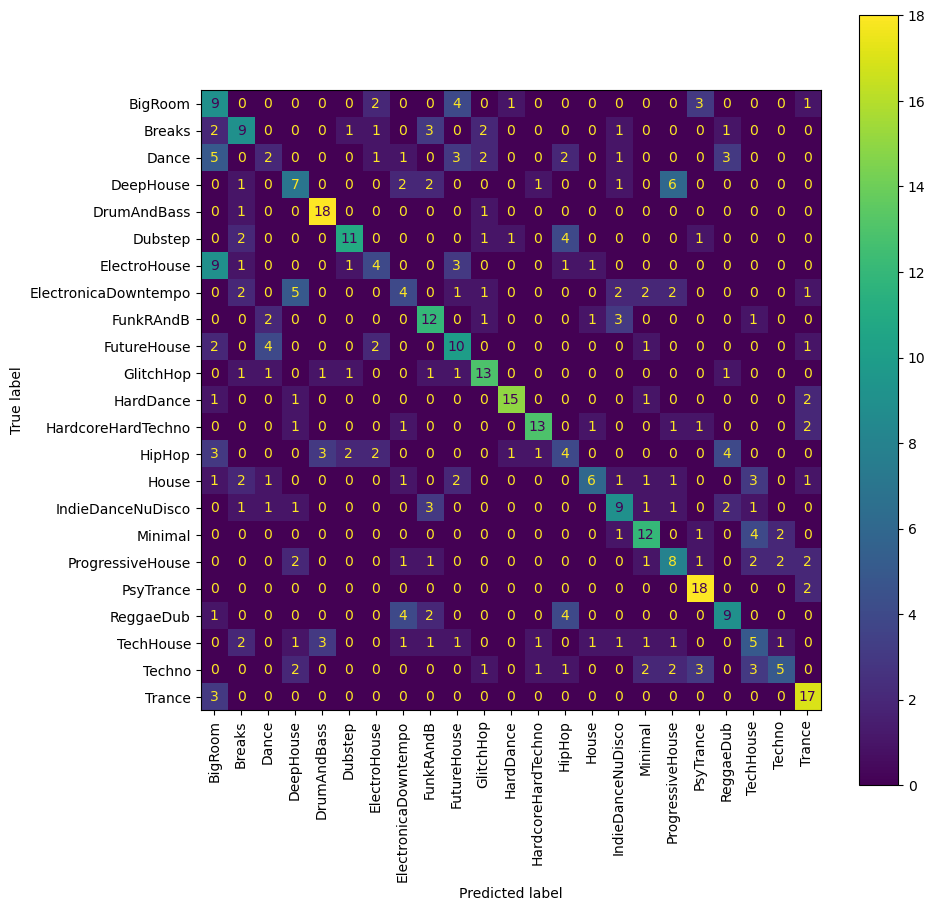

In [45]:
## fit random forest model with best tuned hyperparameters on PC data

best_RF2 = RF_clf2.best_estimator_
best_RF2.fit(pc_xtrain, ytrain)
print(best_RF2.get_params())

# predict classifications on scaled test data
RF_yhat2 = best_RF2.predict(pc_xtest)

RF_cr2 = classification_report(ytest, RF_yhat2, output_dict=True) # create dictionary of metrics
print(classification_report(ytest, RF_yhat2)) # print out performance metrics

matrix = confusion_matrix(ytest, RF_yhat2) # calculate confusion matrix
RF_ca2 = matrix.diagonal()/matrix.sum(axis=1) # calculate accuracy for each class

disp = ConfusionMatrixDisplay.from_predictions(ytest, RF_yhat2, xticks_rotation='vertical') # plot confusion matrix
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10) 

### KNN (with PC)

In [46]:
## run KNN on PC data 

# build model with training data transformed to principal components
KNN_clf2 = KNeighborsClassifier()
KNN_clf2.fit(pc_xtrain, ytrain)
print(KNN_clf2.get_params())

acc = KNN_clf2.score(pc_xtest, ytest)
print("The accuracy with default hyperparameters is: " + str(acc))

# # predict classifications on test data transformed to principal components
# KNN_yhat2 = KNN_clf2.predict(pc_xtest)

# KNN_cr2 = classification_report(ytest, KNN_yhat2, output_dict=True) # create dictionary of metrics
# print(classification_report(ytest, KNN_yhat2)) # print out performance metrics

# disp = ConfusionMatrixDisplay.from_predictions(ytest, KNN_yhat2, xticks_rotation='vertical') # plot confusion matrix
# fig = disp.figure_
# fig.set_figwidth(10)
# fig.set_figheight(10) 

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
The accuracy with default hyperparameters is: 0.34782608695652173


In [47]:
## perform CV search for KNN

KNN2 = KNeighborsClassifier()
n_n = range(1,16,2)
w = ('uniform', 'distance')
power = range(1,4)
parameters = {'n_neighbors': n_n, 'weights': w, 'p': power}

KNN_clf2 = GridSearchCV(KNN2, parameters, cv=3, scoring='accuracy').fit(pc_xtrain, ytrain)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 13, 'p': 2, 'weights': 'distance'}
                      precision    recall  f1-score   support

             BigRoom       0.27      0.65      0.38        20
              Breaks       0.25      0.30      0.27        20
               Dance       0.21      0.20      0.21        20
           DeepHouse       0.40      0.20      0.27        20
         DrumAndBass       0.93      0.65      0.76        20
             Dubstep       0.62      0.50      0.56        20
        ElectroHouse       0.19      0.30      0.23        20
ElectronicaDowntempo       0.29      0.10      0.15        20
           FunkRAndB       0.53      0.50      0.51        20
         FutureHouse       0.21      0.35      0.26        20
           GlitchHop       0.48      0.50      0.49        20
           HardDance       0.83      0.75      0.79        20
  HardcoreHardTechno       0.40      0.20 

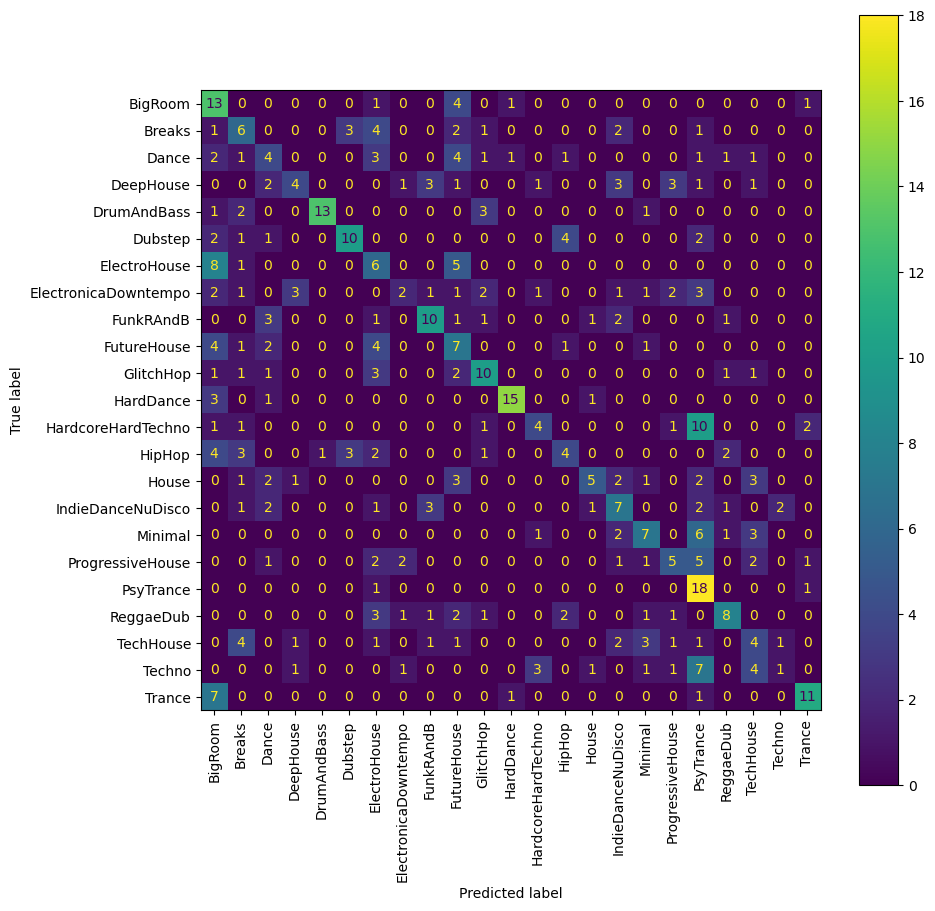

In [48]:
## fit KNN model with best tuned hyperparameters

best_KNN2 = KNN_clf2.best_estimator_
best_KNN2.fit(pc_xtrain, ytrain)
print(best_KNN2.get_params())

# predict classifications on scaled test data
KNN_yhat2 = best_KNN2.predict(pc_xtest)

KNN_cr2 = classification_report(ytest, KNN_yhat2, output_dict=True) # create dictionary of metrics
print(classification_report(ytest, KNN_yhat2)) # print out performance metrics

matrix = confusion_matrix(ytest, KNN_yhat2) # calculate confusion matrix
KNN_ca2 = matrix.diagonal()/matrix.sum(axis=1) # calculate accuracy for each class

disp = ConfusionMatrixDisplay.from_predictions(ytest, KNN_yhat2, xticks_rotation='vertical') # plot confusion matrix
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10) 

## Compare model performance and summarize

### Bar plots for precision, recall, f1-score, accuracy

In [49]:
## grab weighted avg data for all models

# create list of reports
report_list = [LR_cr, LinSVM_cr, rbfSVM_cr, NN_cr, RF_cr, KNN_cr, 
               LR_cr2, LinSVM_cr2, rbfSVM_cr2, NN_cr2, RF_cr2, KNN_cr2] # list of dictionaries

# initialize empty lists for data storage
precision = []
recall = []
f1 = []
accuracy = []

# access reports for weighted avg data and transfer to lists
for report in report_list:
    precision.append(report['weighted avg']['precision'])
    recall.append(report['weighted avg']['recall'])
    f1.append(report['weighted avg']['f1-score'])
    accuracy.append(report['accuracy'])
    
    
# create list of model names
models = ['Logistic Regression w/ original features', 'Linear SVM w/ original features', 
          'RBF SVM w/ original features', 'Neural Network w/ original features',
          'Random Forest w/ original features', 'KNN w/ original features',
          'Logistic Regression w/ 46 PC', 'Linear SVM w/ 46 PC', 
          'RBF SVM w/ 46 PC', 'Neural Network w/ 46 PC',
          'Random Forest w/ 46 PC', 'KNN w/ 46 PC']

Text(0.5, 1.0, 'Weighted Average of Precision')

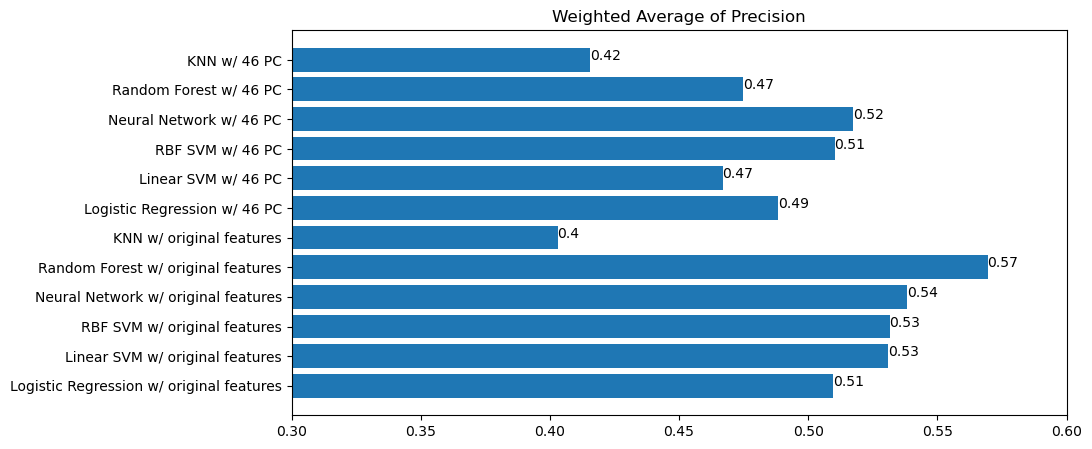

In [50]:
## plot precision weighted average

fig = plt.figure(figsize=(10,5))
plt.barh(models, precision)
plt.xlim(0.3,0.6)
for i in range(len(models)): # add data labels
    plt.text(precision[i], i, round(precision[i],2), ha='left')
plt.title('Weighted Average of Precision')

Text(0.5, 1.0, 'Weighted Average of Recall')

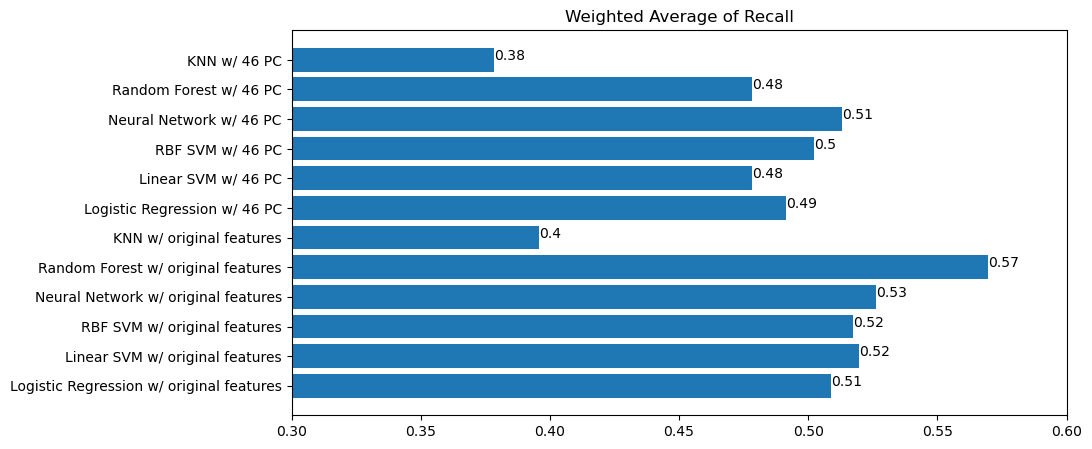

In [51]:
## plot recall weighted average

fig = plt.figure(figsize=(10,5))
plt.barh(models, recall)
plt.xlim(0.3,0.6)
for i in range(len(models)): # add data labels
    plt.text(recall[i], i, round(recall[i],2), ha='left')
plt.title('Weighted Average of Recall')

Text(0.5, 1.0, 'Weighted Average of F1-Score')

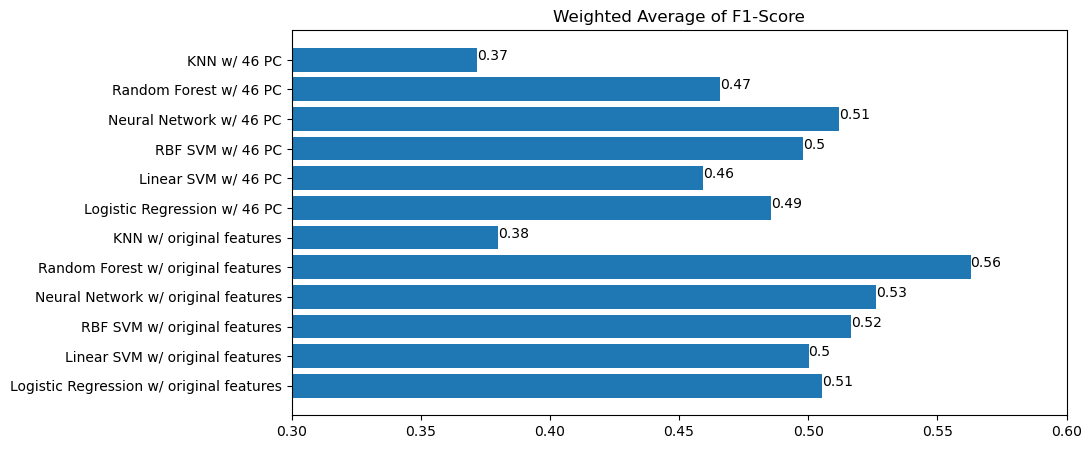

In [52]:
## plot f1-score weighted average

fig = plt.figure(figsize=(10,5))
plt.barh(models, f1)
plt.xlim(0.3,0.6)
for i in range(len(models)): # add data labels
    plt.text(f1[i], i, round(f1[i],2), ha='left')
plt.title('Weighted Average of F1-Score')

Text(0.5, 1.0, 'Accuracy')

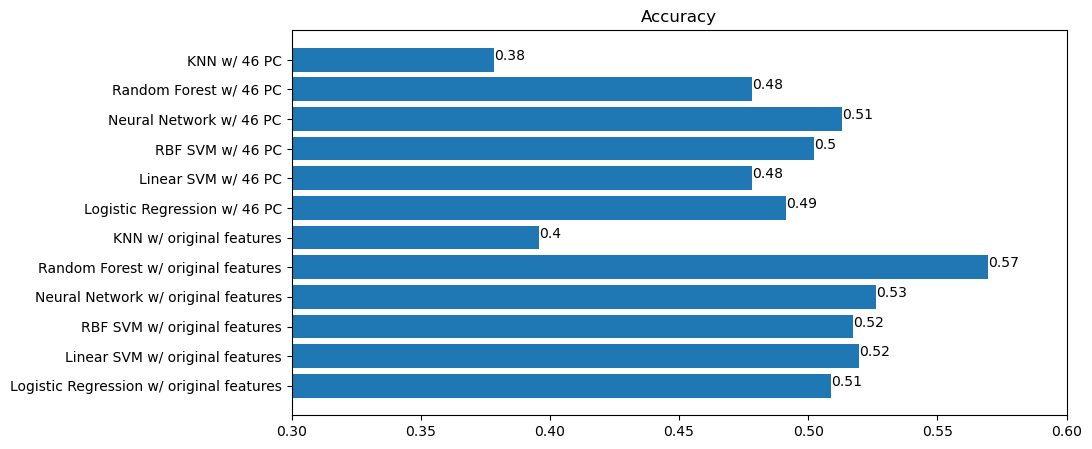

In [53]:
## plot accuracy

fig = plt.figure(figsize=(10,5))
plt.barh(models, accuracy)
plt.xlim(0.3,0.6)
for i in range(len(models)): # add data labels
    plt.text(accuracy[i], i, round(accuracy[i],2), ha='left')
plt.title('Accuracy')

### Heat map of all classification metrics

In [54]:
## import packages
import seaborn as sns

Text(0.5, 1.0, 'Overall Classification Performance for All Models')

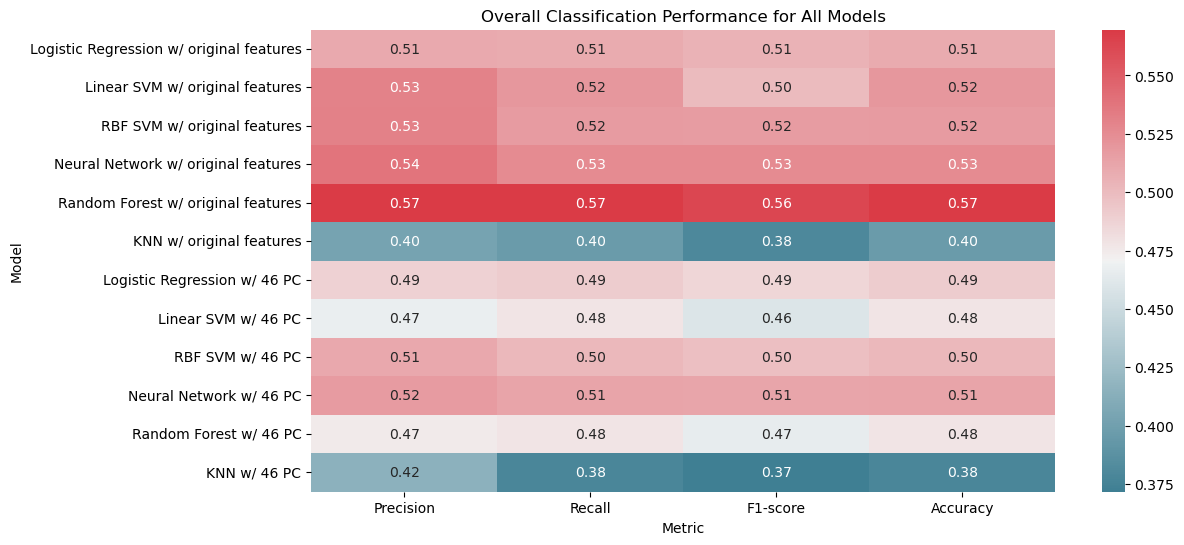

In [55]:
## compile metrics into an array then create heat map

M = (precision, recall, f1, accuracy)
scores = np.vstack(M).T # 12 x 4 (models x metrics

# create color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# create heat map
sns.heatmap(scores, cmap=cmap, annot=True, fmt='.2f',
            xticklabels=('Precision', 'Recall', 'F1-score', 'Accuracy'), yticklabels=models)

# add labels and title
plt.xlabel('Metric')
plt.ylabel('Model')
plt.title('Overall Classification Performance for All Models')

### Heat map of f1-scores for all models and genres

In [56]:
## get f1-score of all models and classes (genres)

genres = songs['class'].unique().tolist() # get list of genre names
class_f1 = np.empty(shape=(len(models),len(genres))) # initialize empty array to store scores

i=0
for report in report_list: 
    j=0    
    for g in genres:
        f1score = report[g]['f1-score']
        class_f1[i,j]=f1score      
        j+=1    
    i+=1

# add column at end for overall f1-score (all genres combined)
class_f1 = np.hstack((class_f1, np.array(f1).reshape((12,1))))


Text(0.5, 1.0, 'Genre F1-scores for All Models')

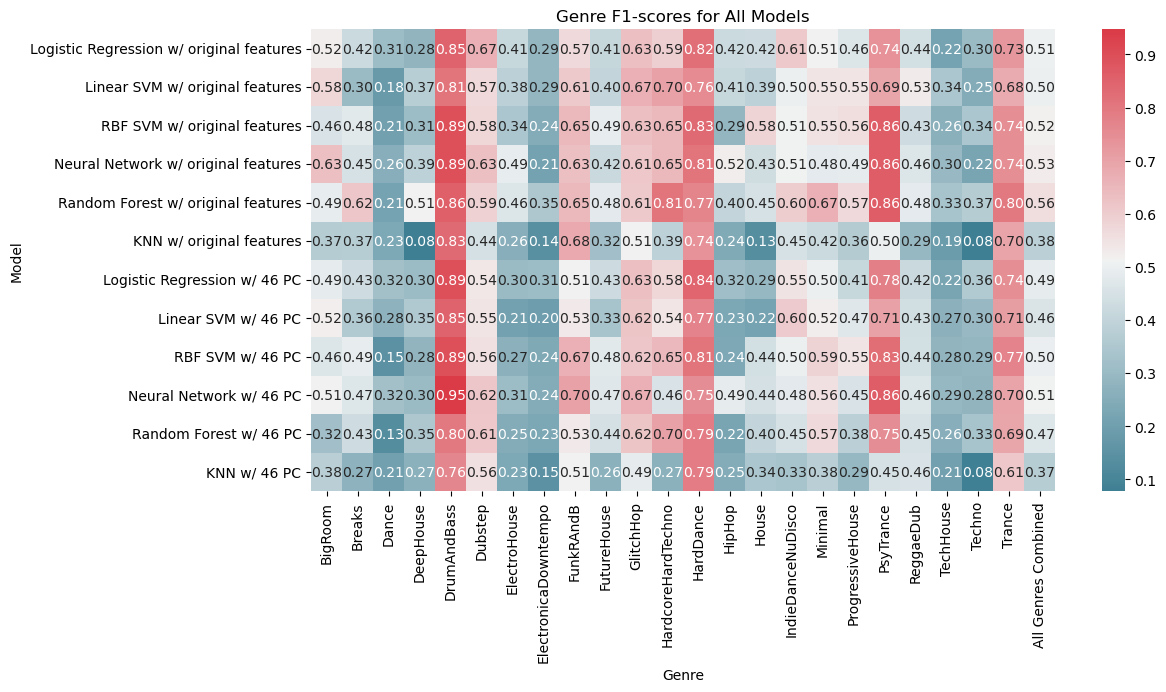

In [57]:
## create heat map of f1-scores for all models and genres

# modify genre list to add "All Genres Combined" to the end
genres_mod = genres
genres_mod.append('All Genres Combined')

# create color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# create heat map
sns.heatmap(class_f1, cmap=cmap, annot=True, fmt='.2f',
            xticklabels=genres_mod, yticklabels=models)

# add labels and title
plt.xlabel('Genre')
plt.ylabel('Model')
plt.title('Genre F1-scores for All Models')

### Heat map of accuracy for all models and genres

In [58]:
## get compile accuracy of all models and classes (genres)

class_accuracy = np.vstack((LR_ca, LinSVM_ca, rbfSVM_ca, NN_ca, RF_ca, KNN_ca, 
                           LR_ca2, LinSVM_ca2, rbfSVM_ca2, NN_ca2, RF_ca2, KNN_ca2))

# add column at end for overall accuracy (all genres combined)
class_accuracy = np.hstack((class_accuracy, np.array(accuracy).reshape((12,1))))



Text(0.5, 1.0, 'Genre Accuracy for All Models')

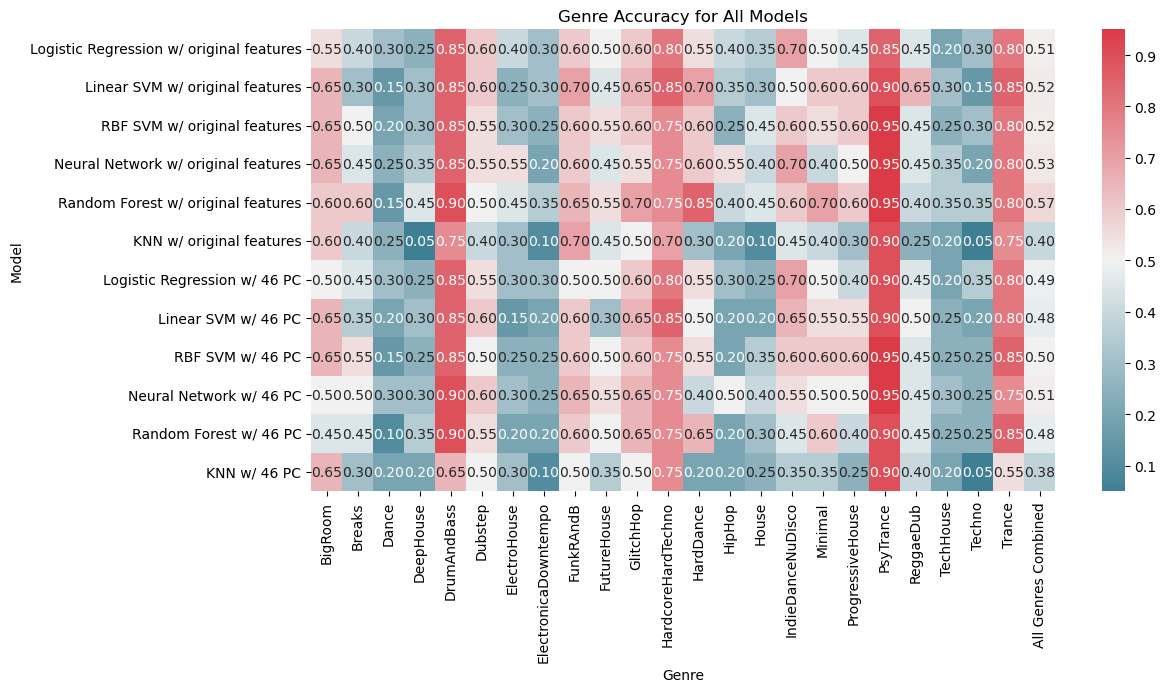

In [59]:
## create heat map of accuracy for all models and genres

# create color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# create heat map
sns.heatmap(class_accuracy, cmap=cmap, annot=True, fmt='.2f',
            xticklabels=genres_mod, yticklabels=models)

# add labels and title
plt.xlabel('Genre')
plt.ylabel('Model')
plt.title('Genre Accuracy for All Models')

## Explore feature importance for Random Forest

Text(0.5, 1.0, 'Feature Importance for Random Forest w/ original features')

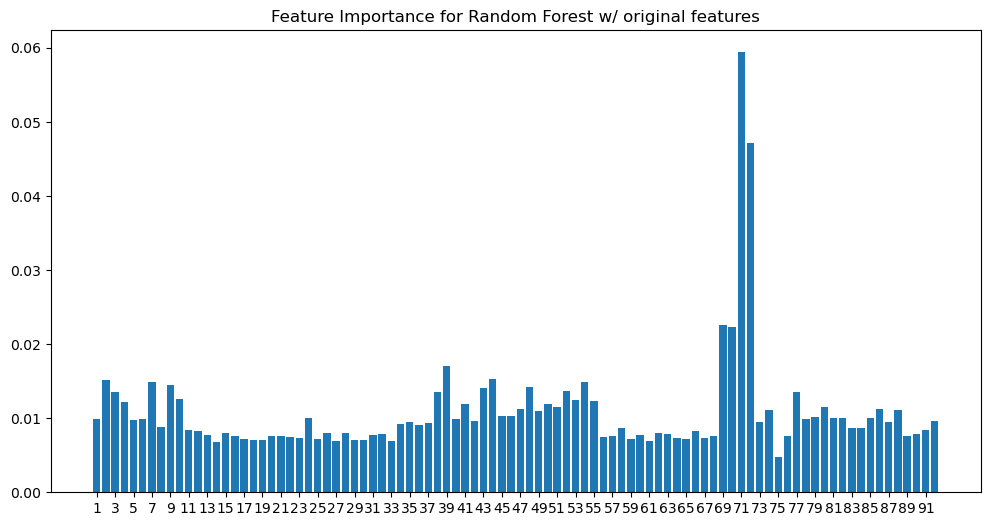

In [60]:
### Explore feature importance for RF with original features

importance = best_RF.feature_importances_

plt.bar(range(1,93), importance)
plt.xticks(range(1,93,2), range(1,93,2))
plt.title('Feature Importance for Random Forest w/ original features')

Text(0.5, 1.0, 'Feature Importance for Random Forest w/ 46 PC')

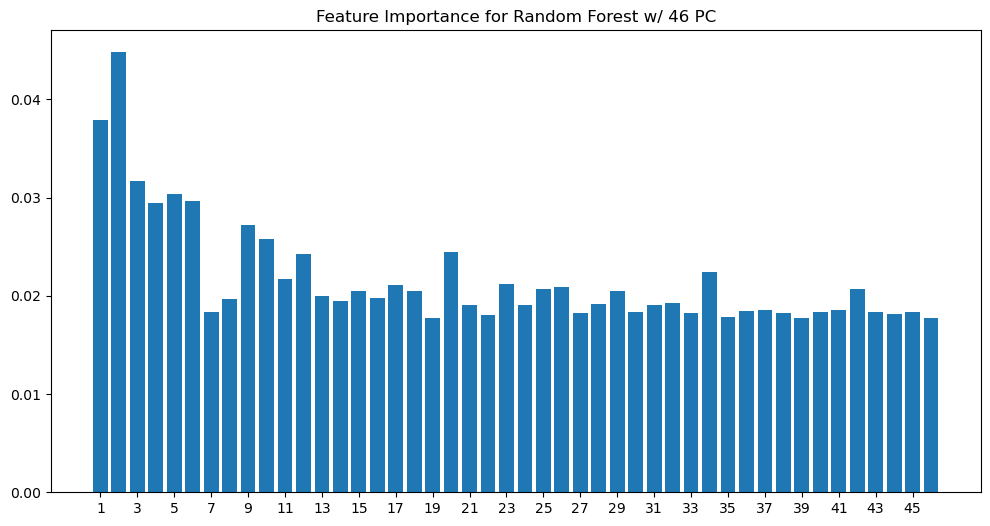

In [61]:
### Explore feature importance for RF with principal components

importance2 = best_RF2.feature_importances_

plt.bar(range(1,47), importance2)
plt.xticks(range(1,47,2), range(1,47,2))
plt.title('Feature Importance for Random Forest w/ 46 PC')